/orange/adamginsburg/jwst/w51/F140M/f140m_nrca3_visit001_vgroup03109_exp00002_daophot_combined_with_satstars.fits
vgroup03109
3109


Set OBSGEO-B to   -25.273375 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611468465.919 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


6 sat stars from catalog
<SkyCoord (ICRS): (ra, dec) in deg
    [(290.93666016, 14.51889954), (290.93120096, 14.52793126),
     (290.92868896, 14.53036045), (290.92809834, 14.52430942),
     (290.92733764, 14.51354064), (290.92184273, 14.52058222)]>
11 number of saturated sources found
Found 0 NaN DQ pixels


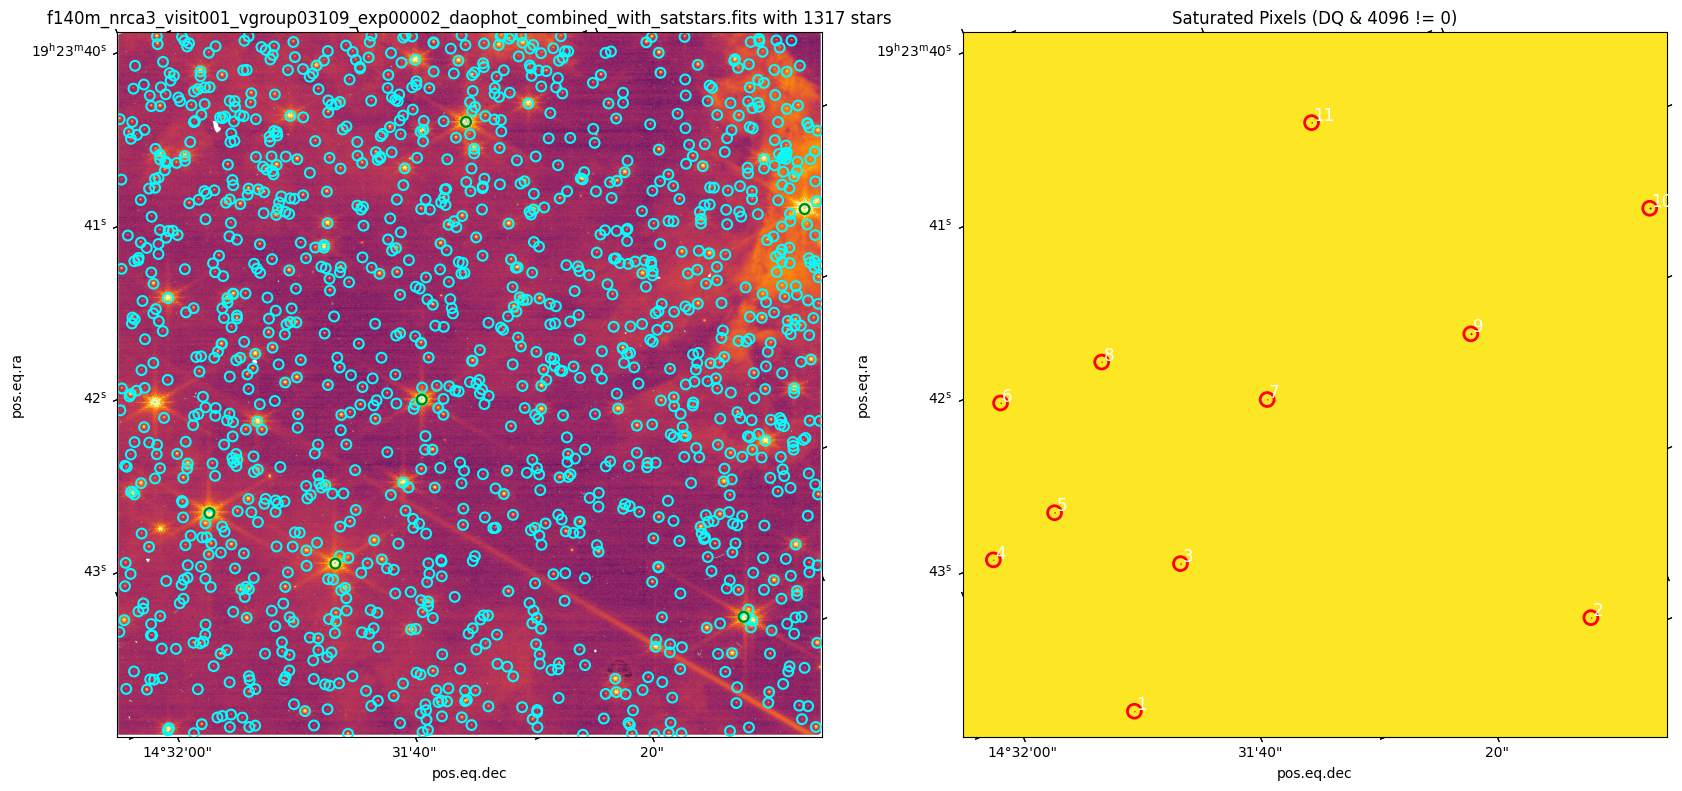

Source 1: center at (x, y) = (499, 73)


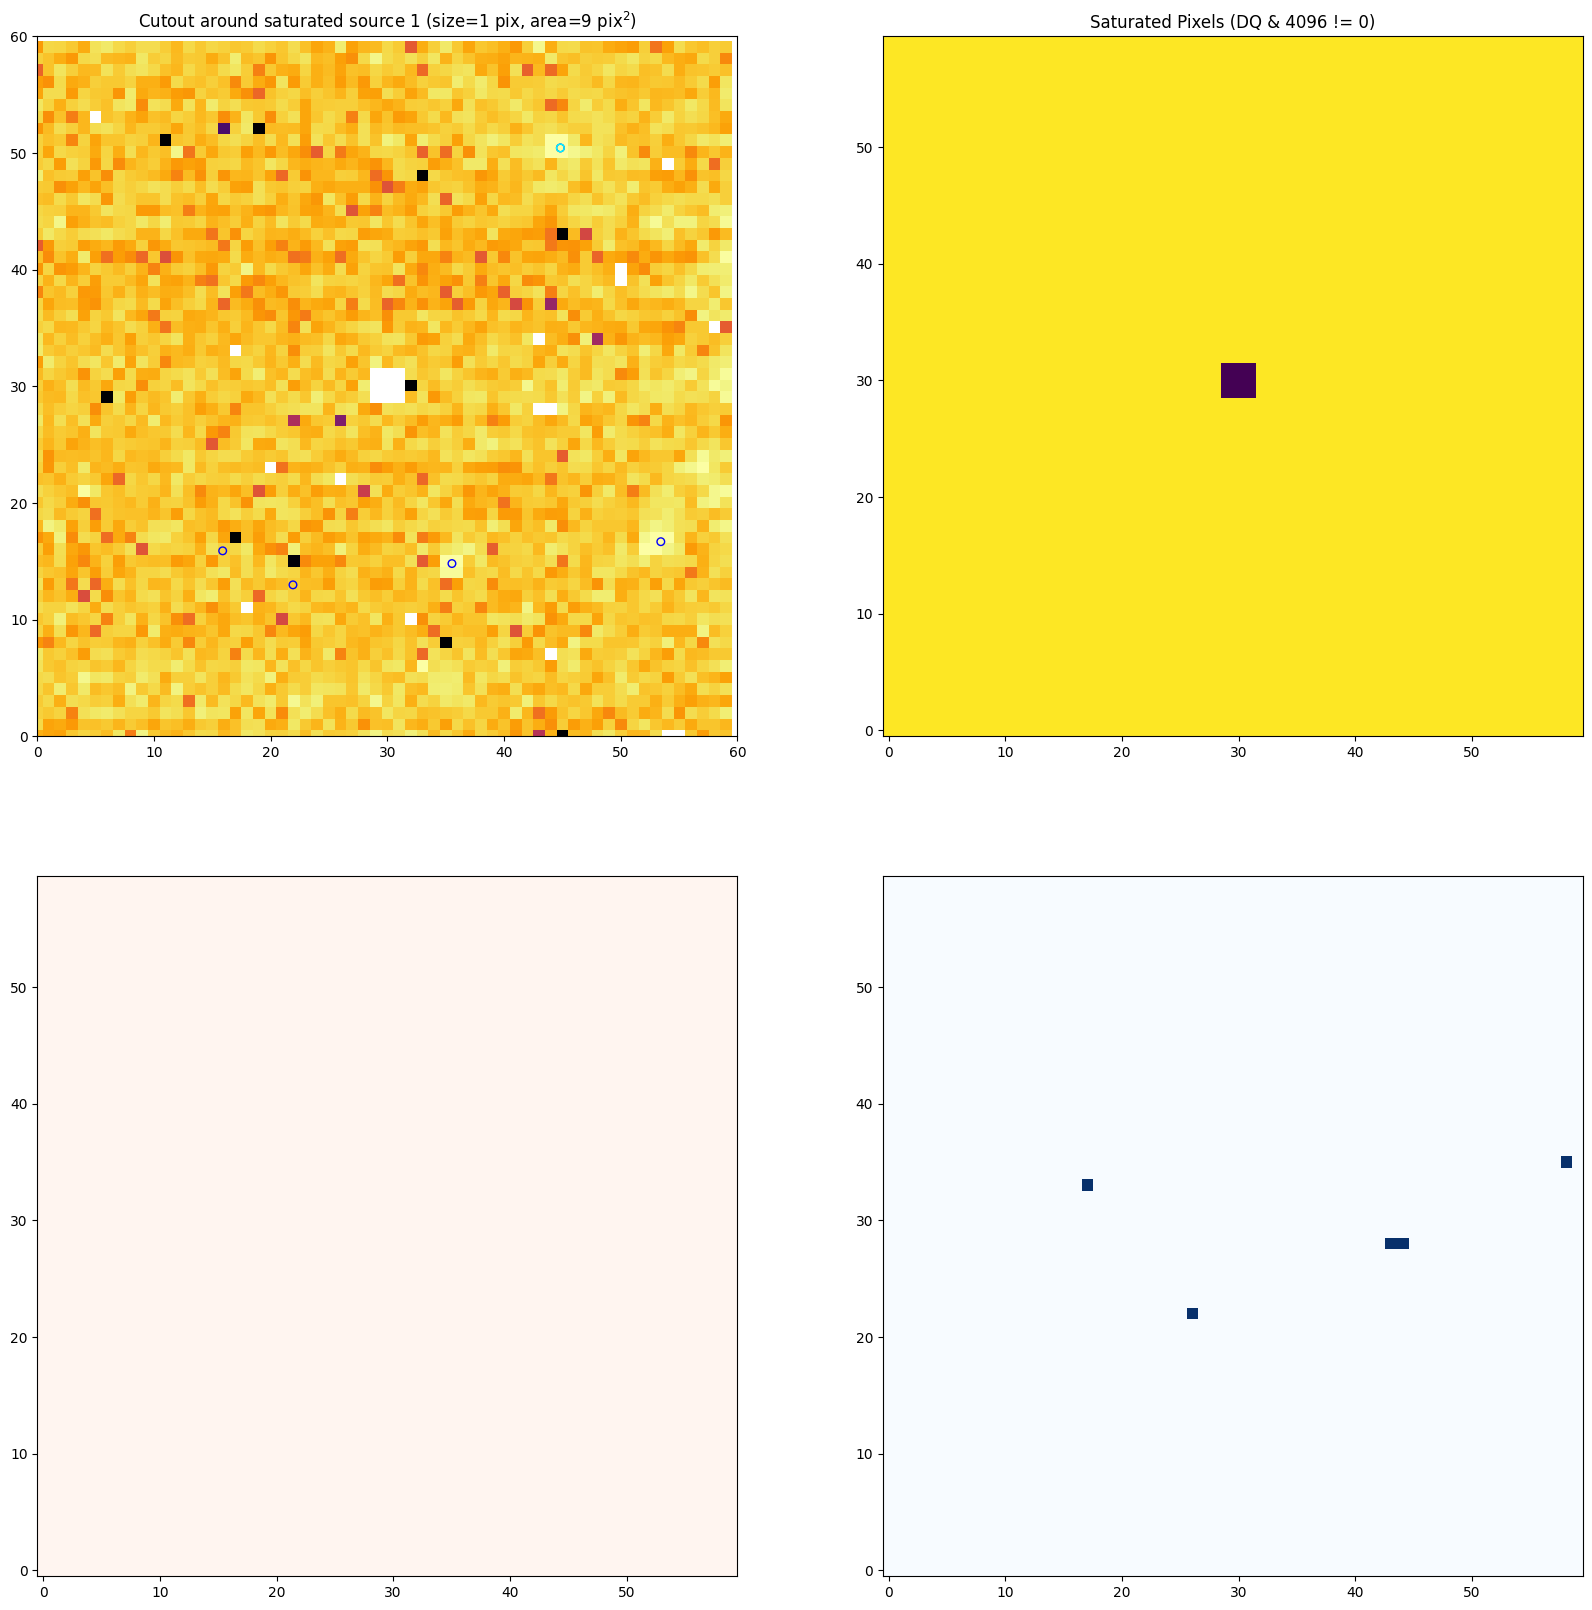

Source 2: center at (x, y) = (1826, 345)


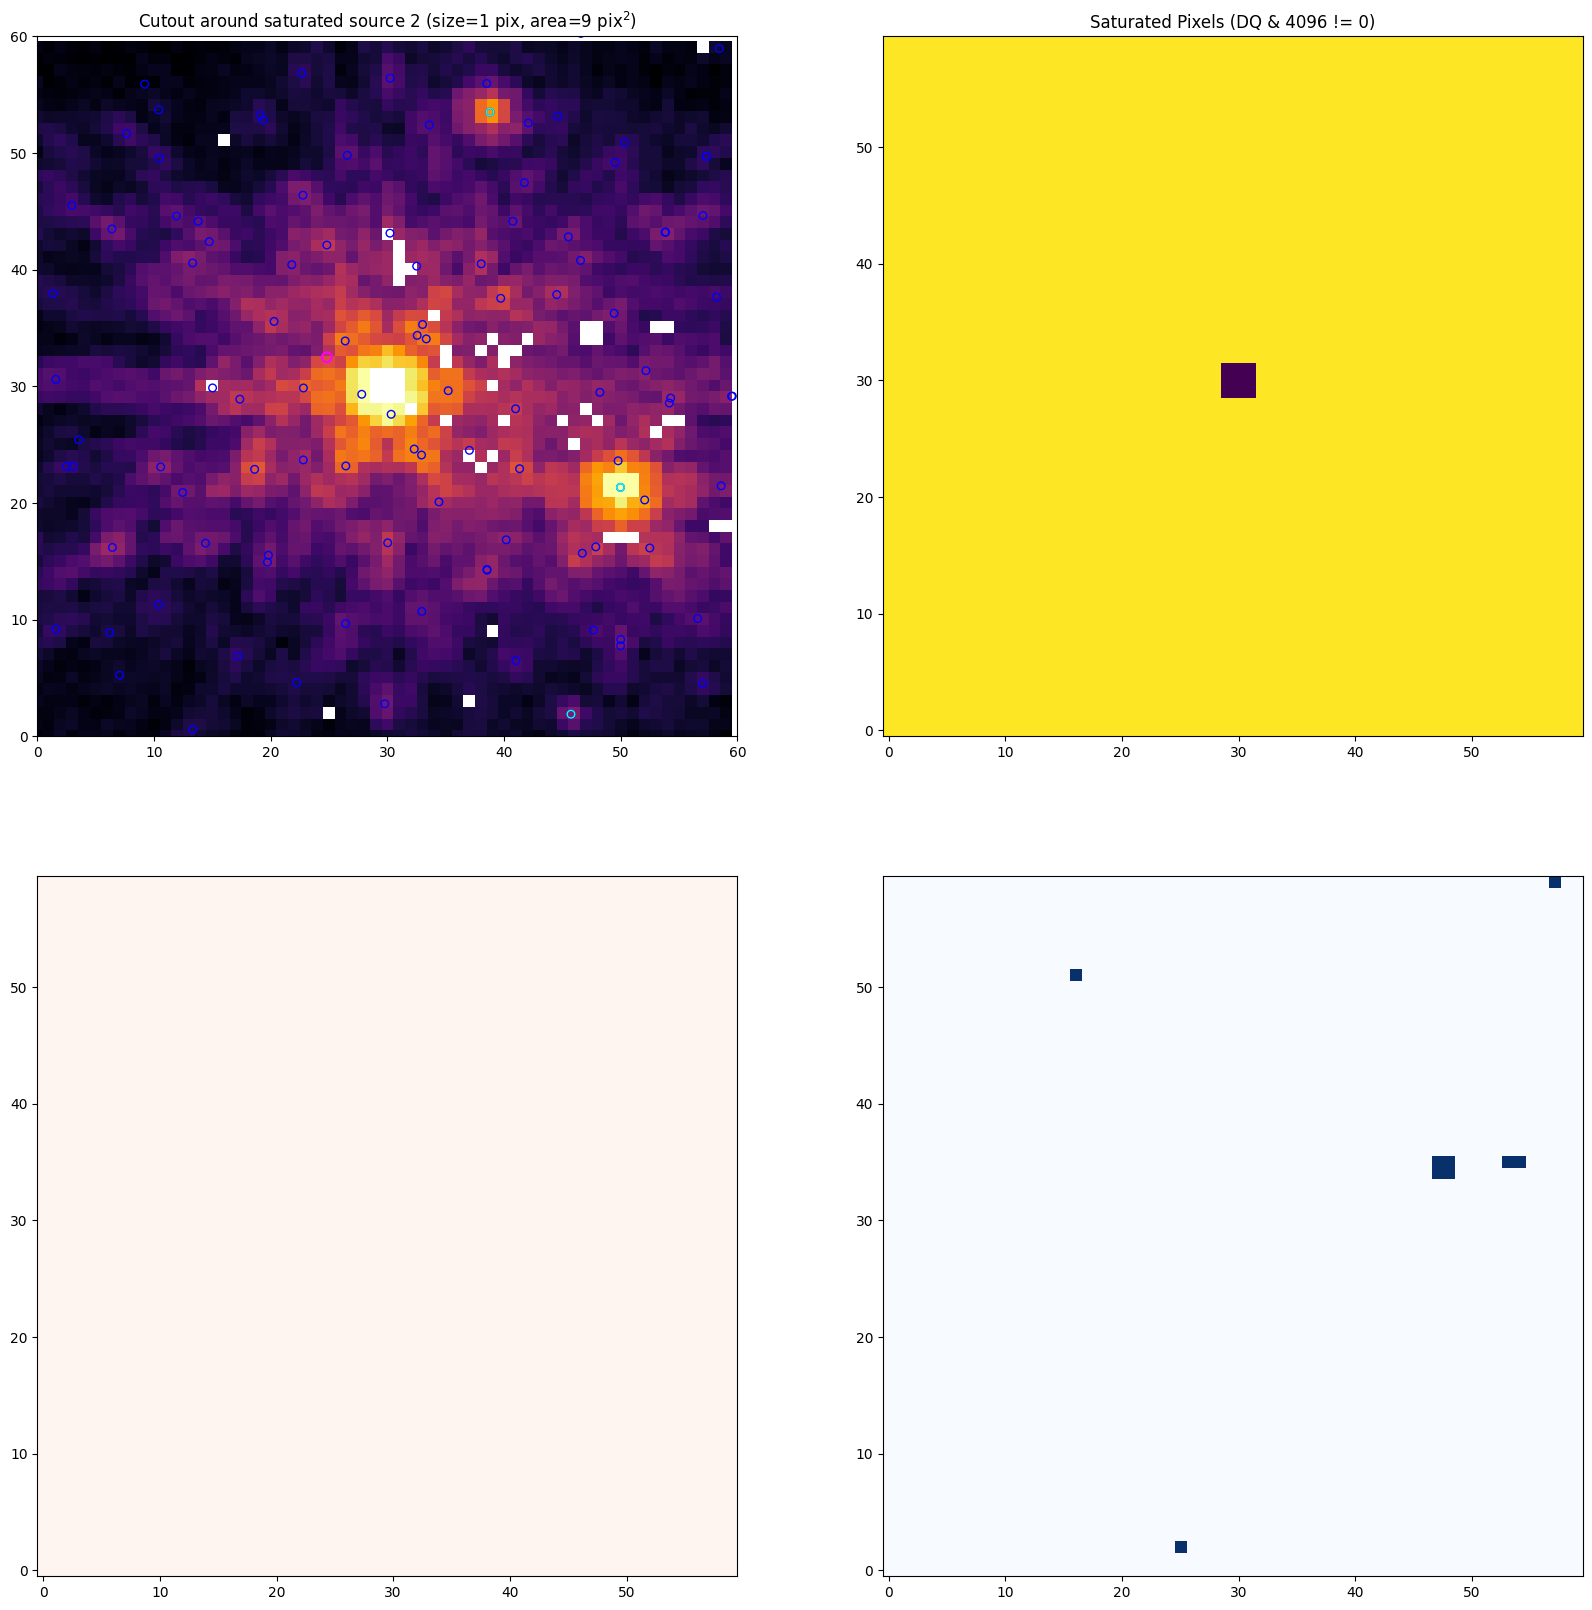

Source 3: center at (x, y) = (633, 502)


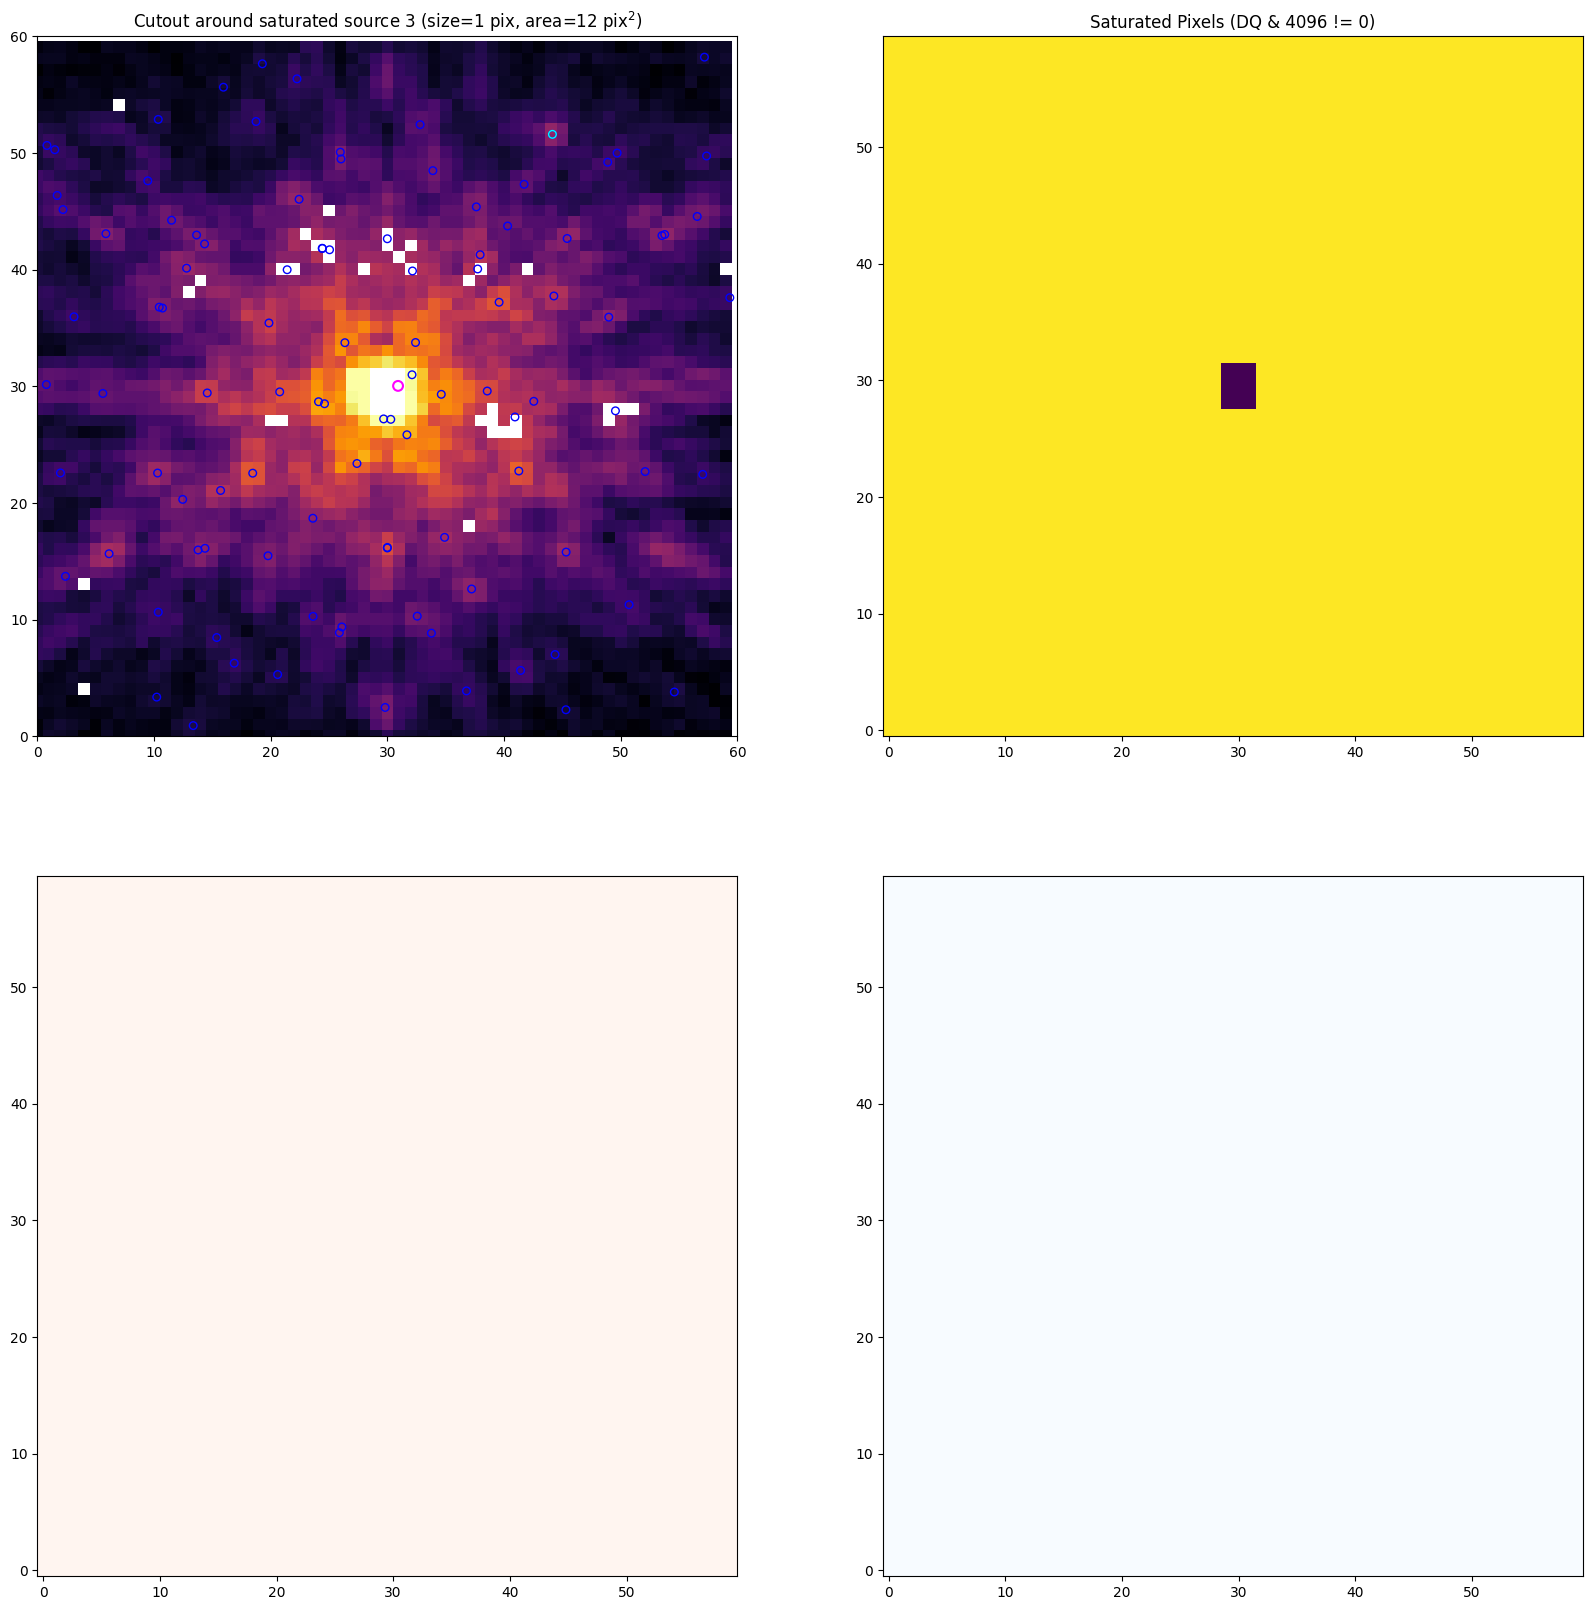

Source 4: center at (x, y) = (89, 513)


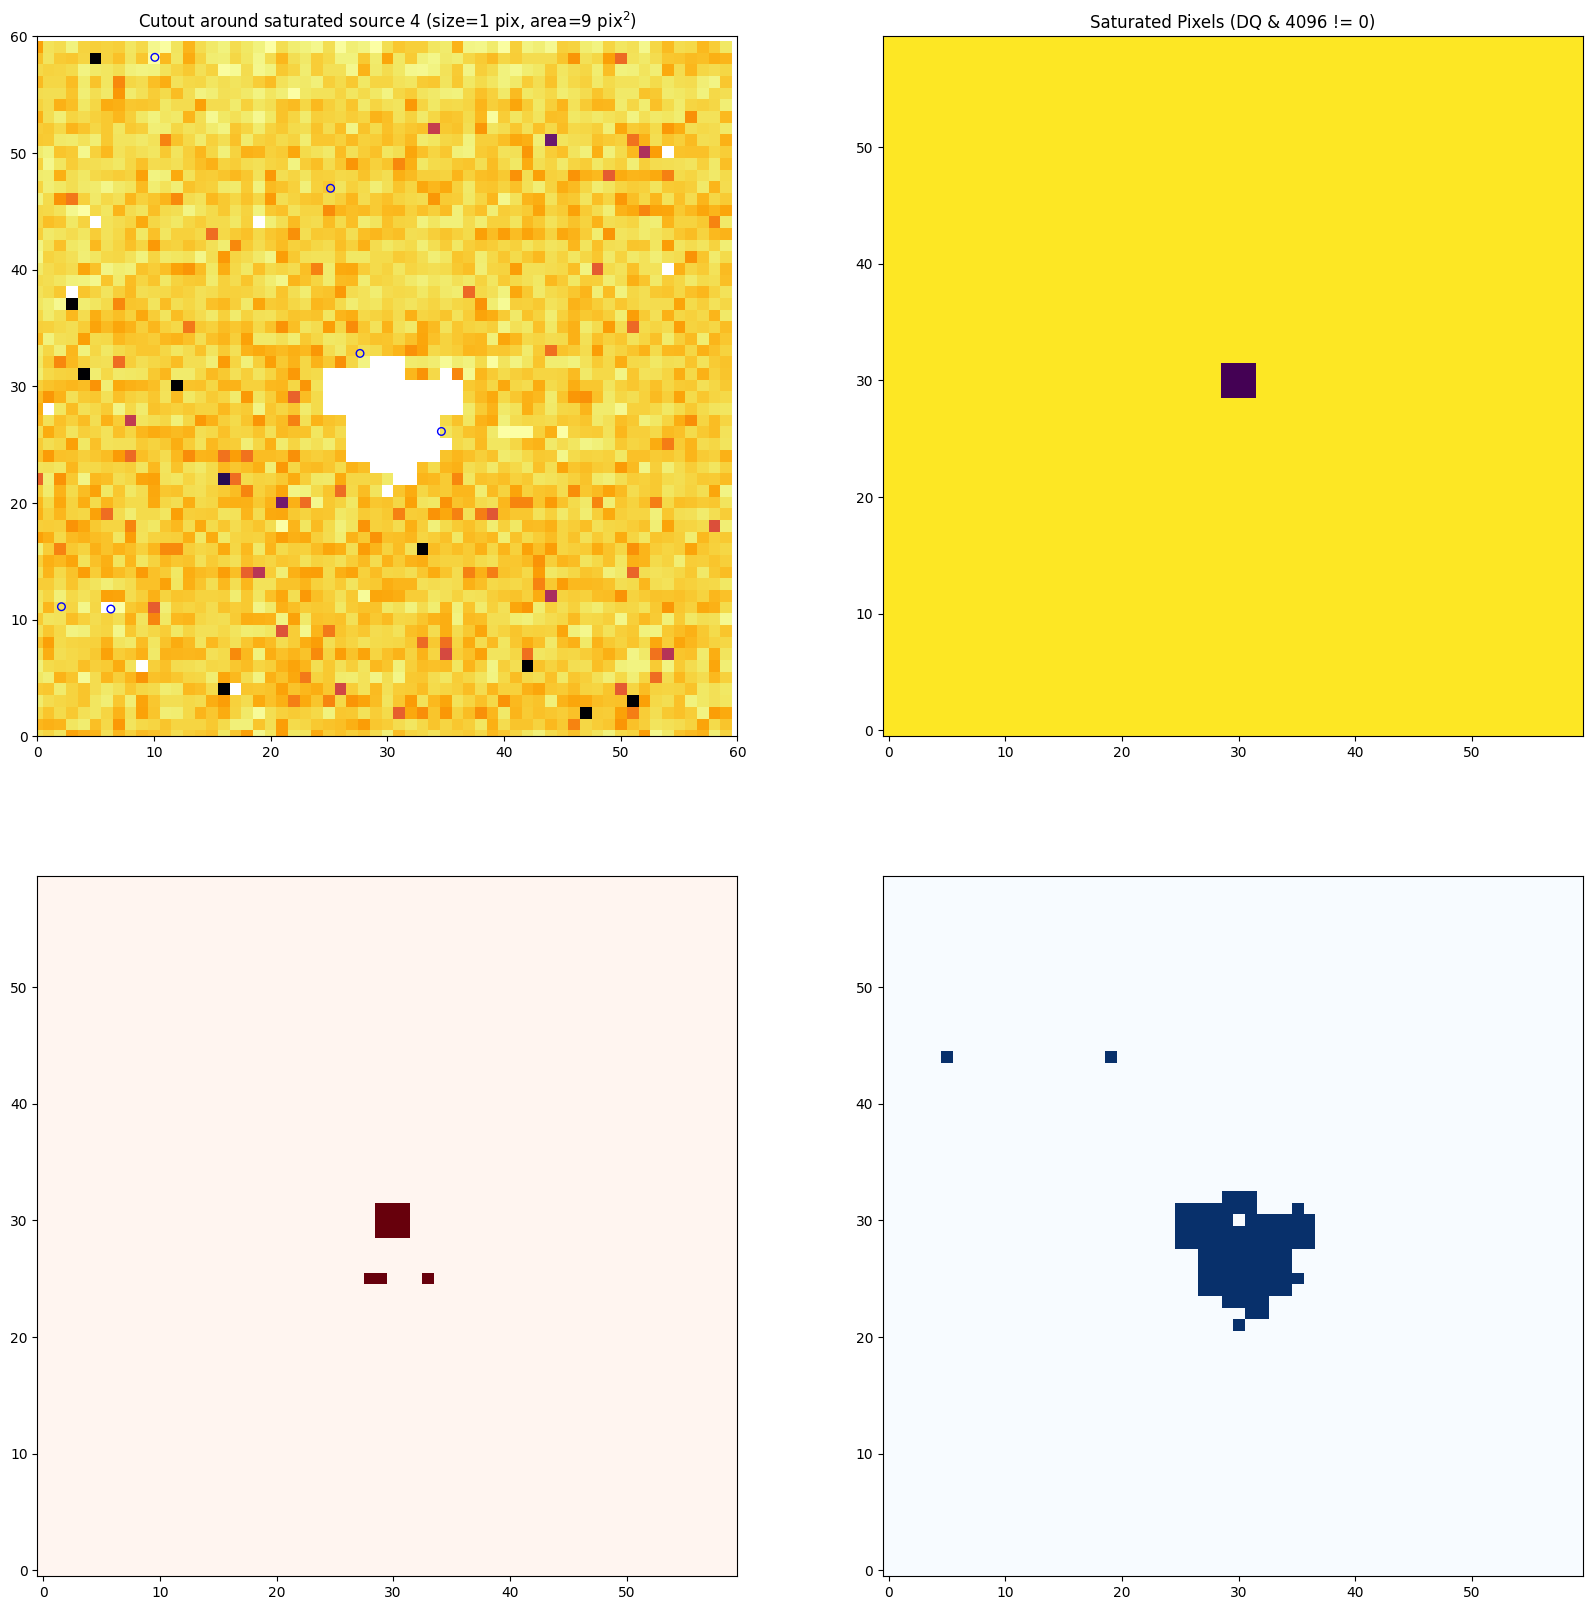

Source 5: center at (x, y) = (267, 650)


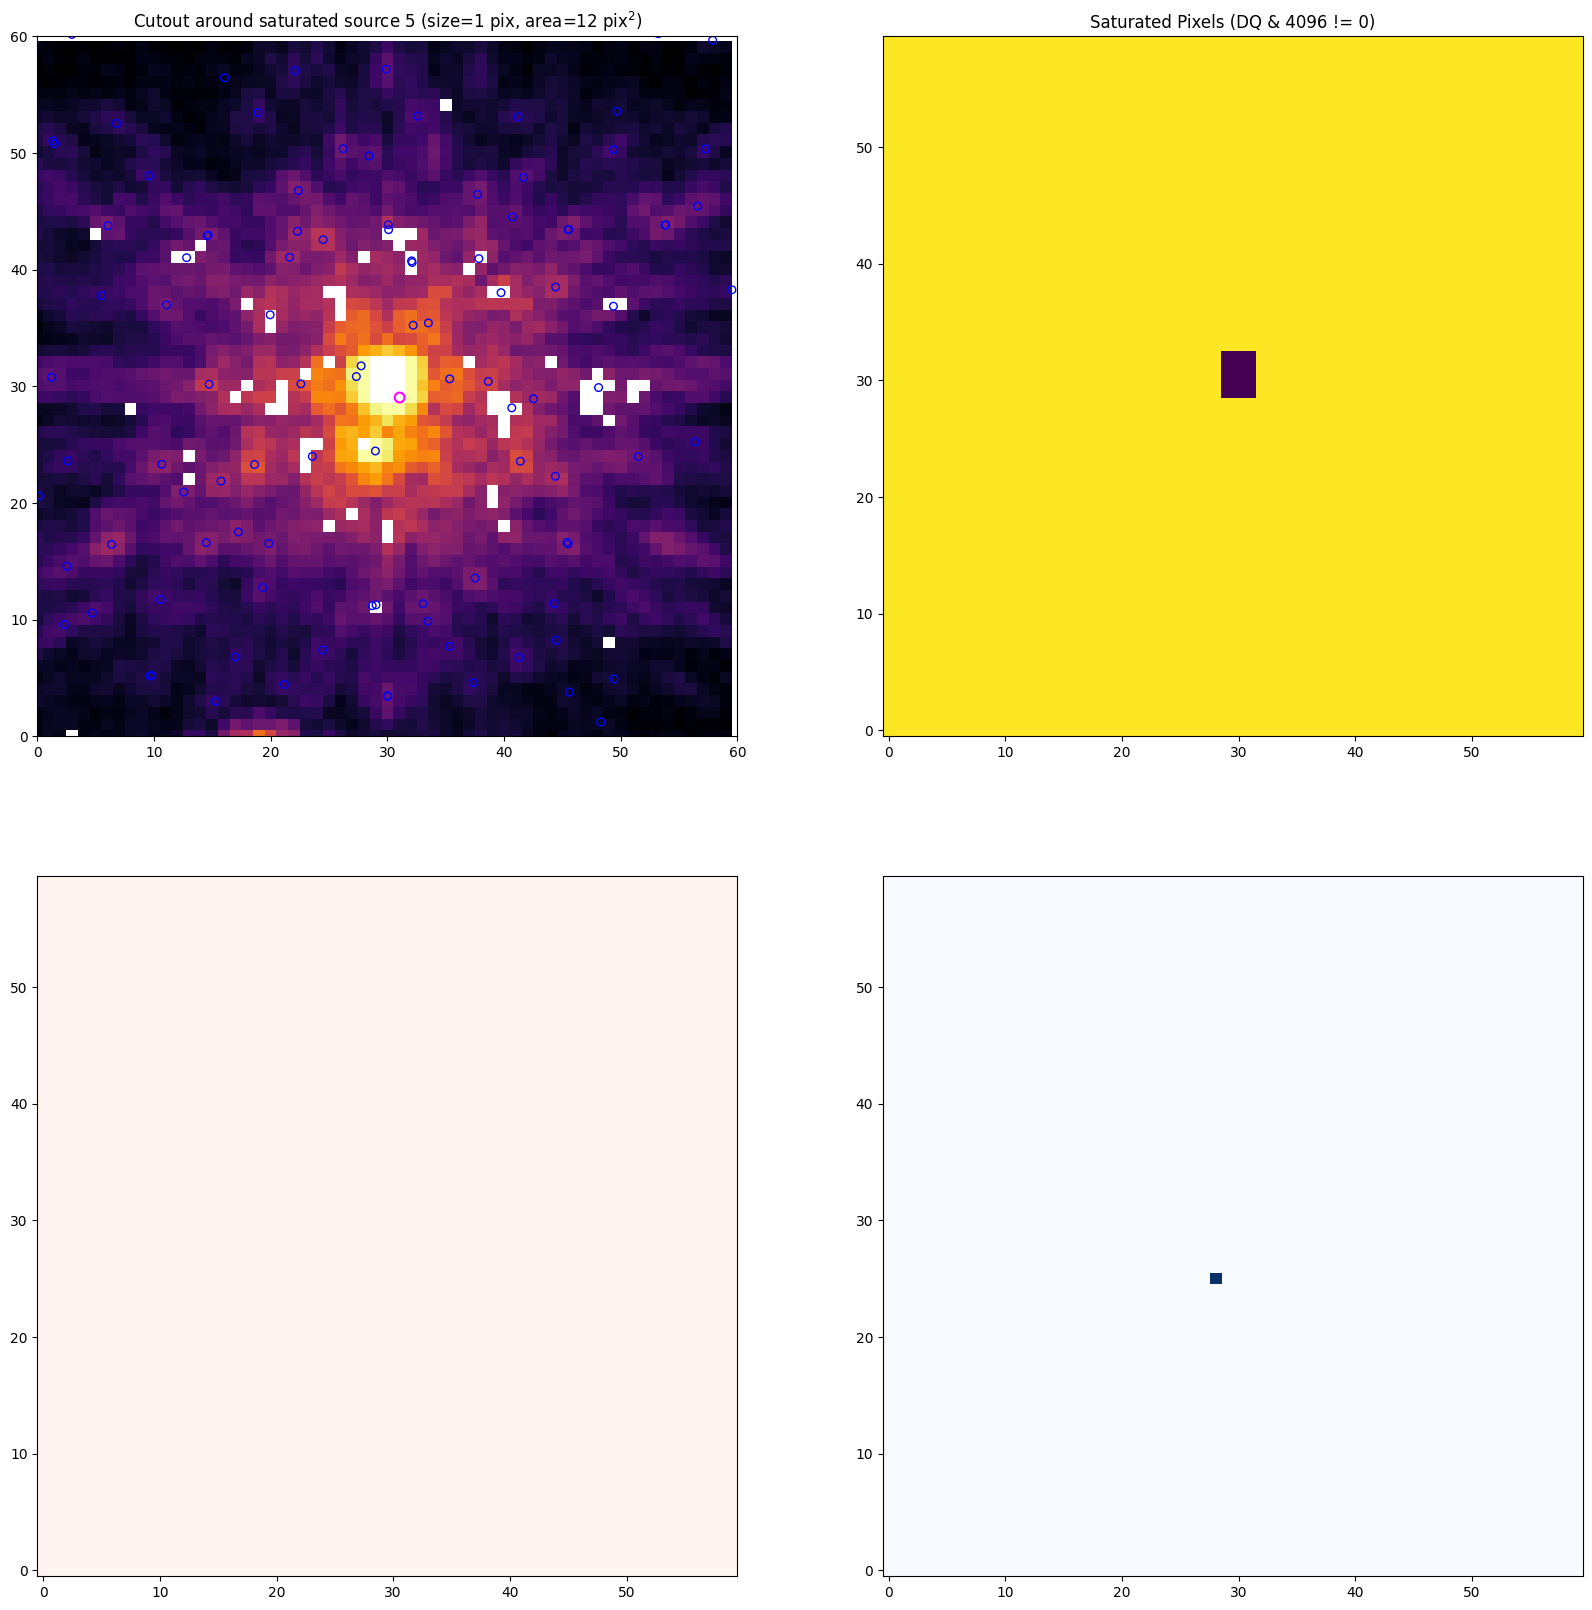

Source 6: center at (x, y) = (110, 969)


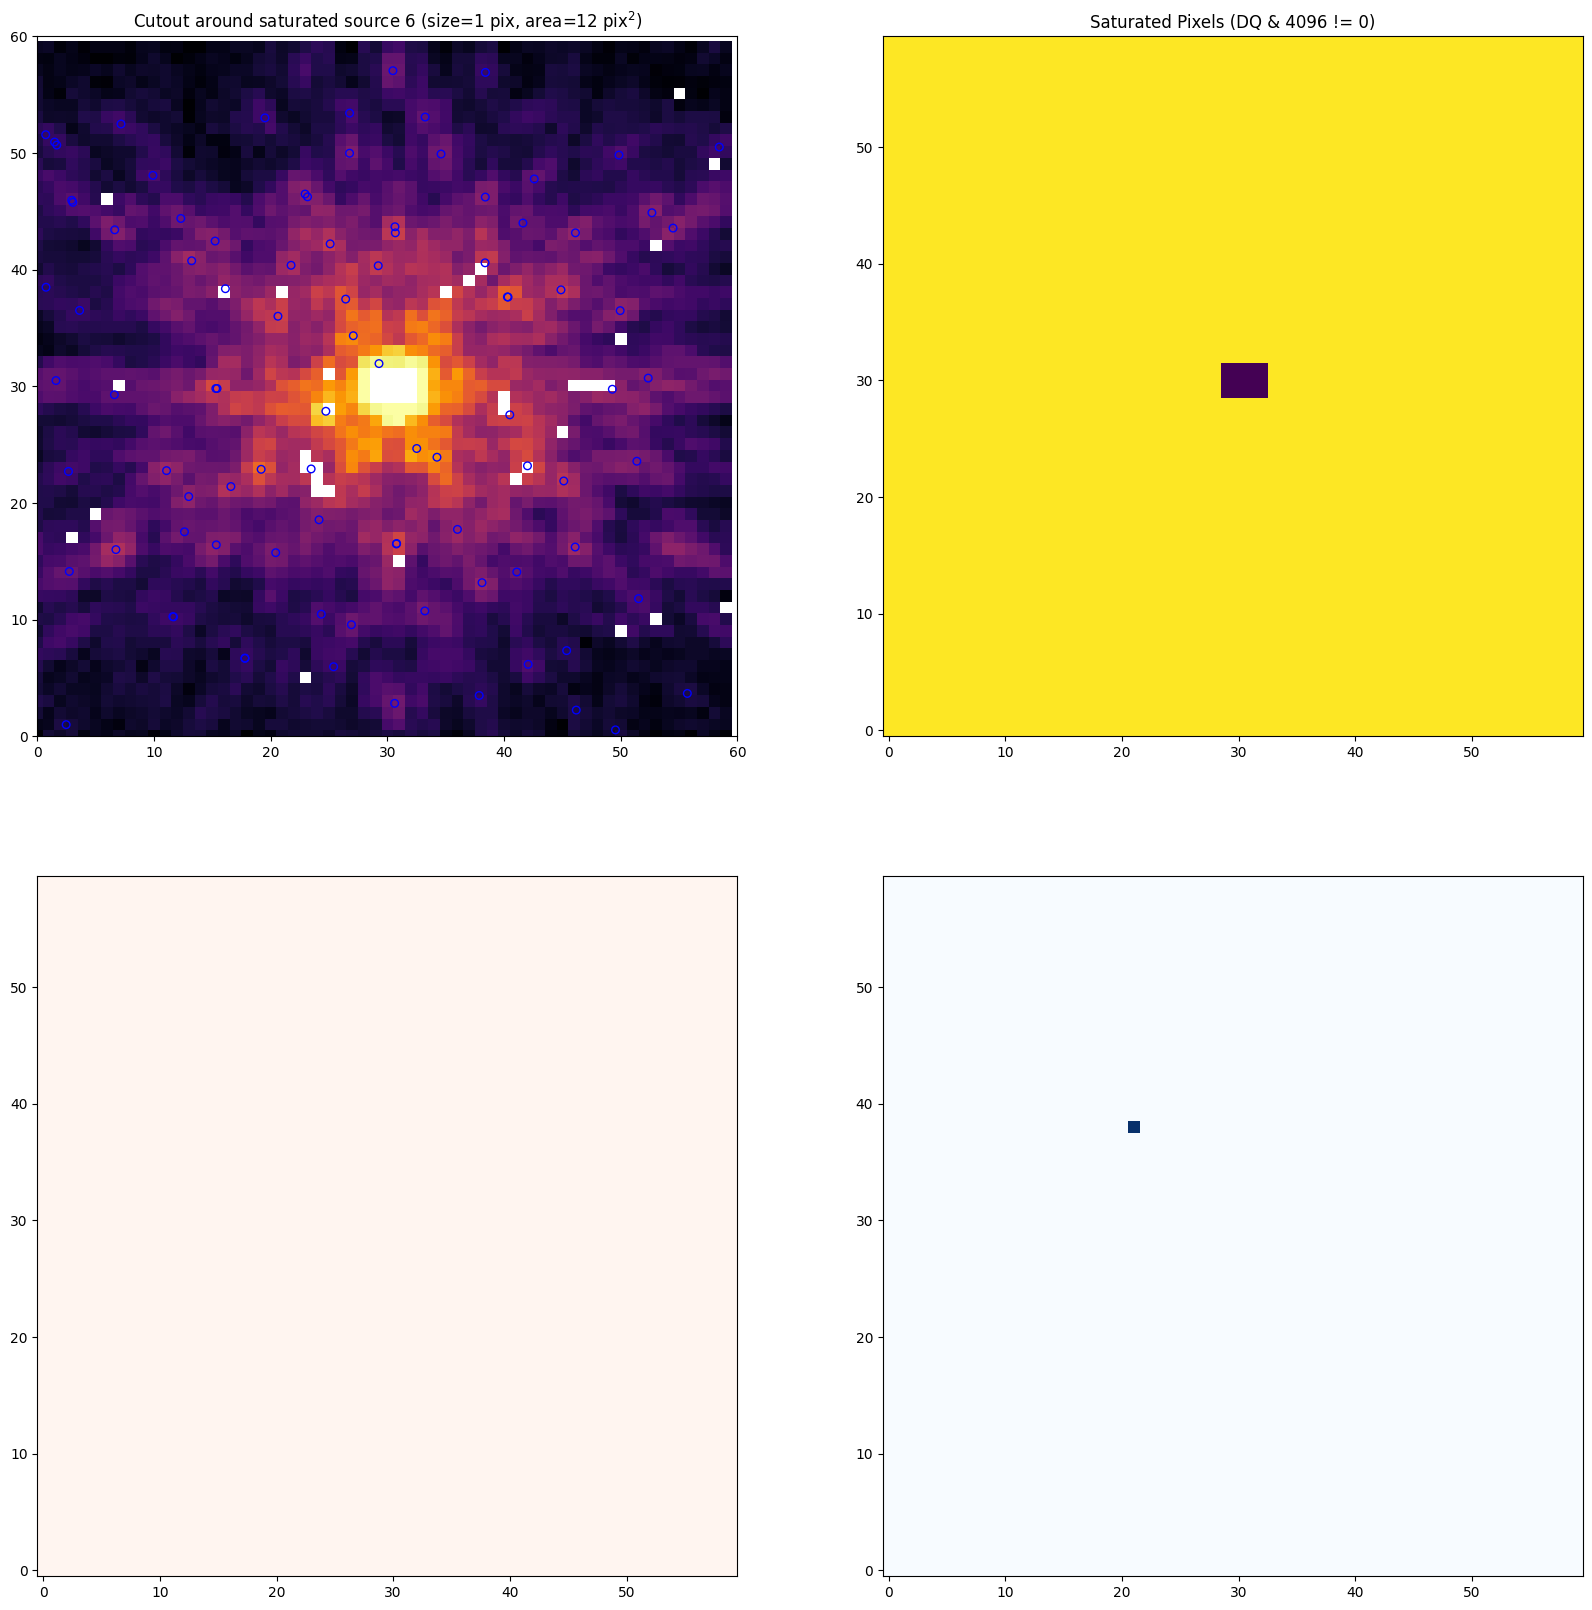

Source 7: center at (x, y) = (885, 979)


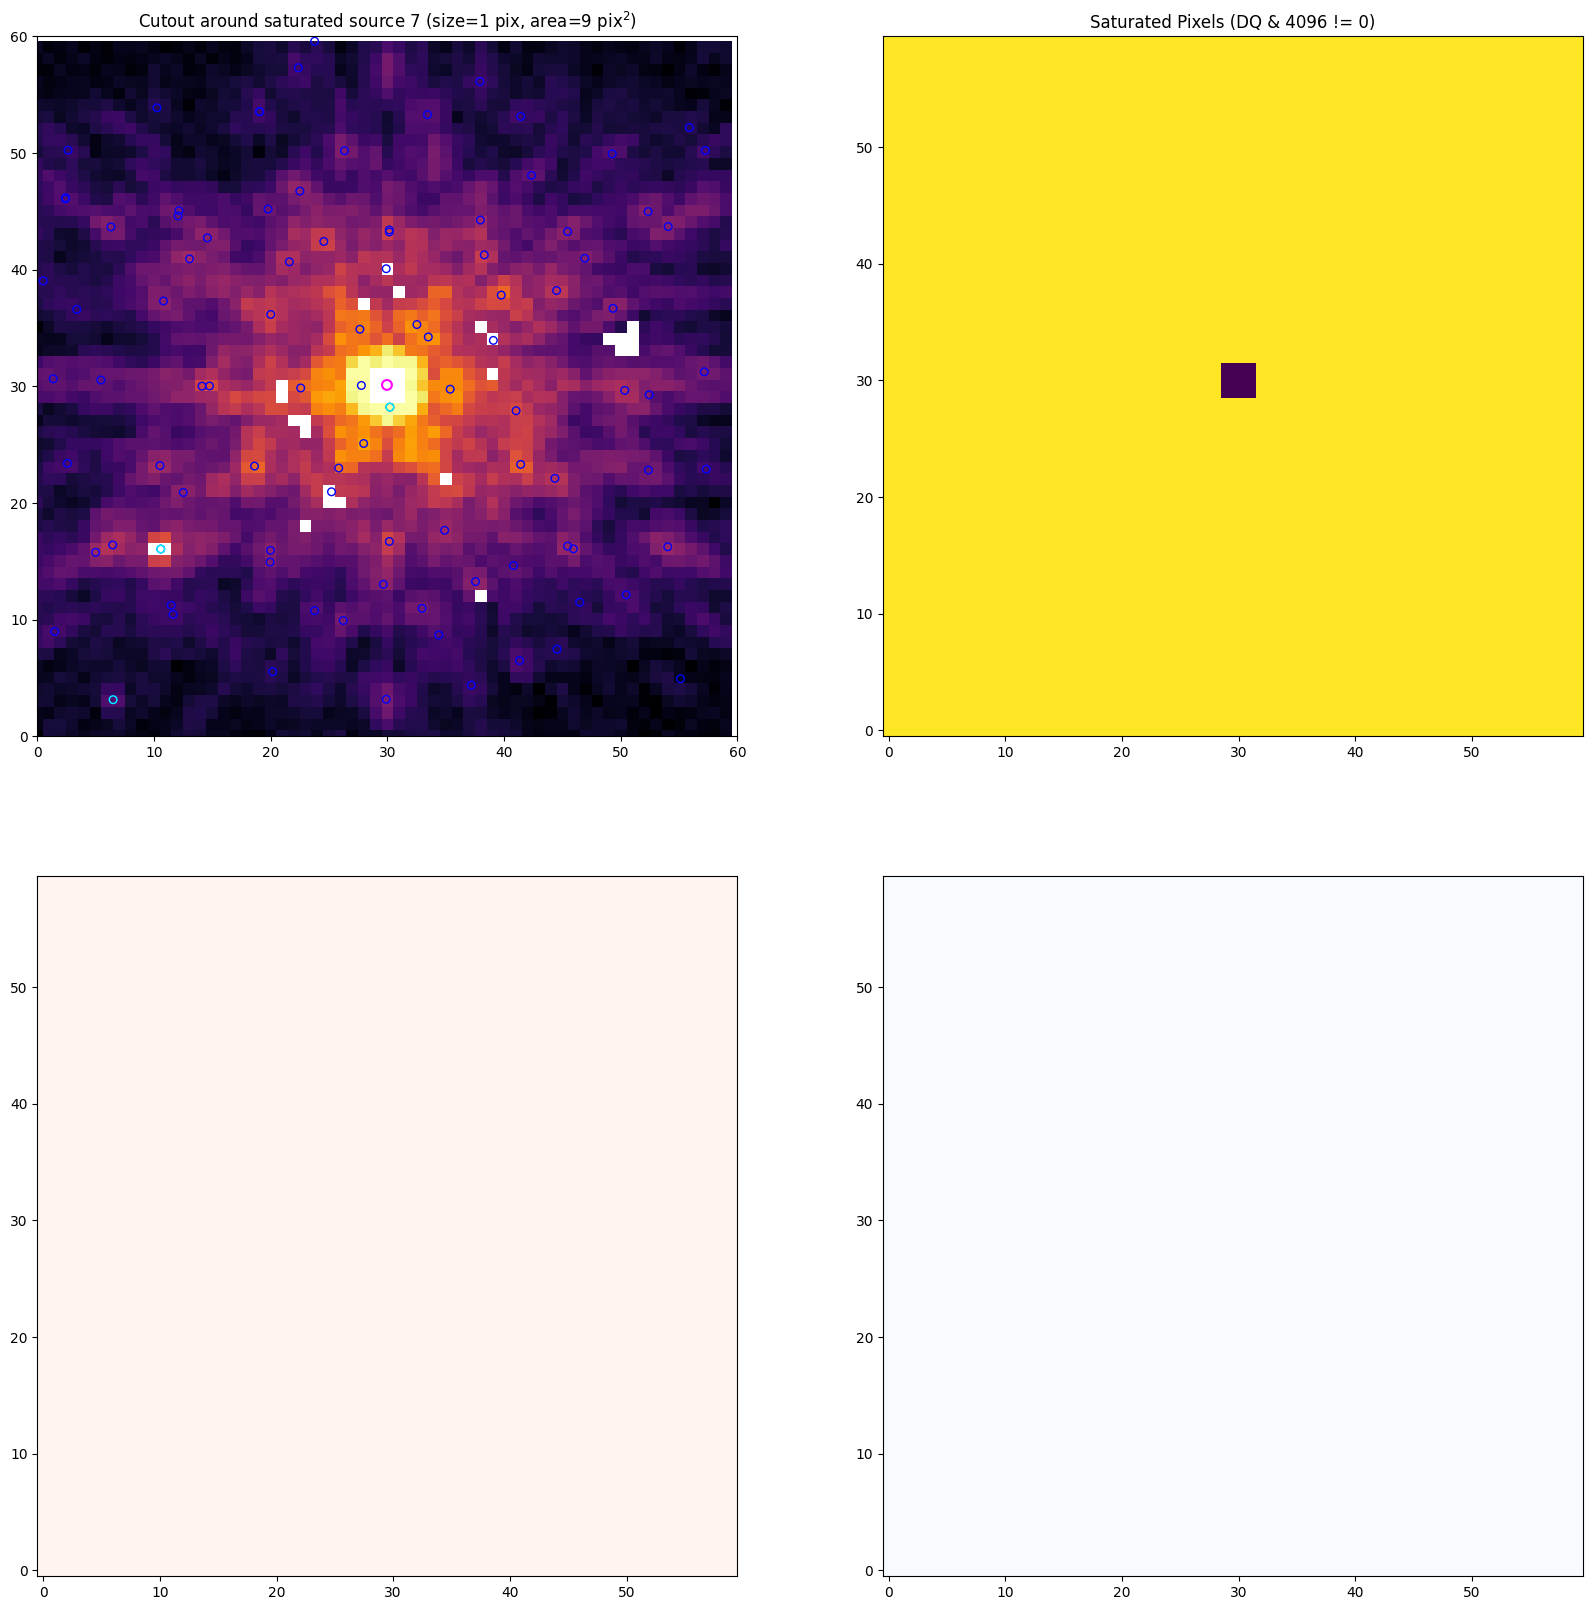

Source 8: center at (x, y) = (404, 1088)


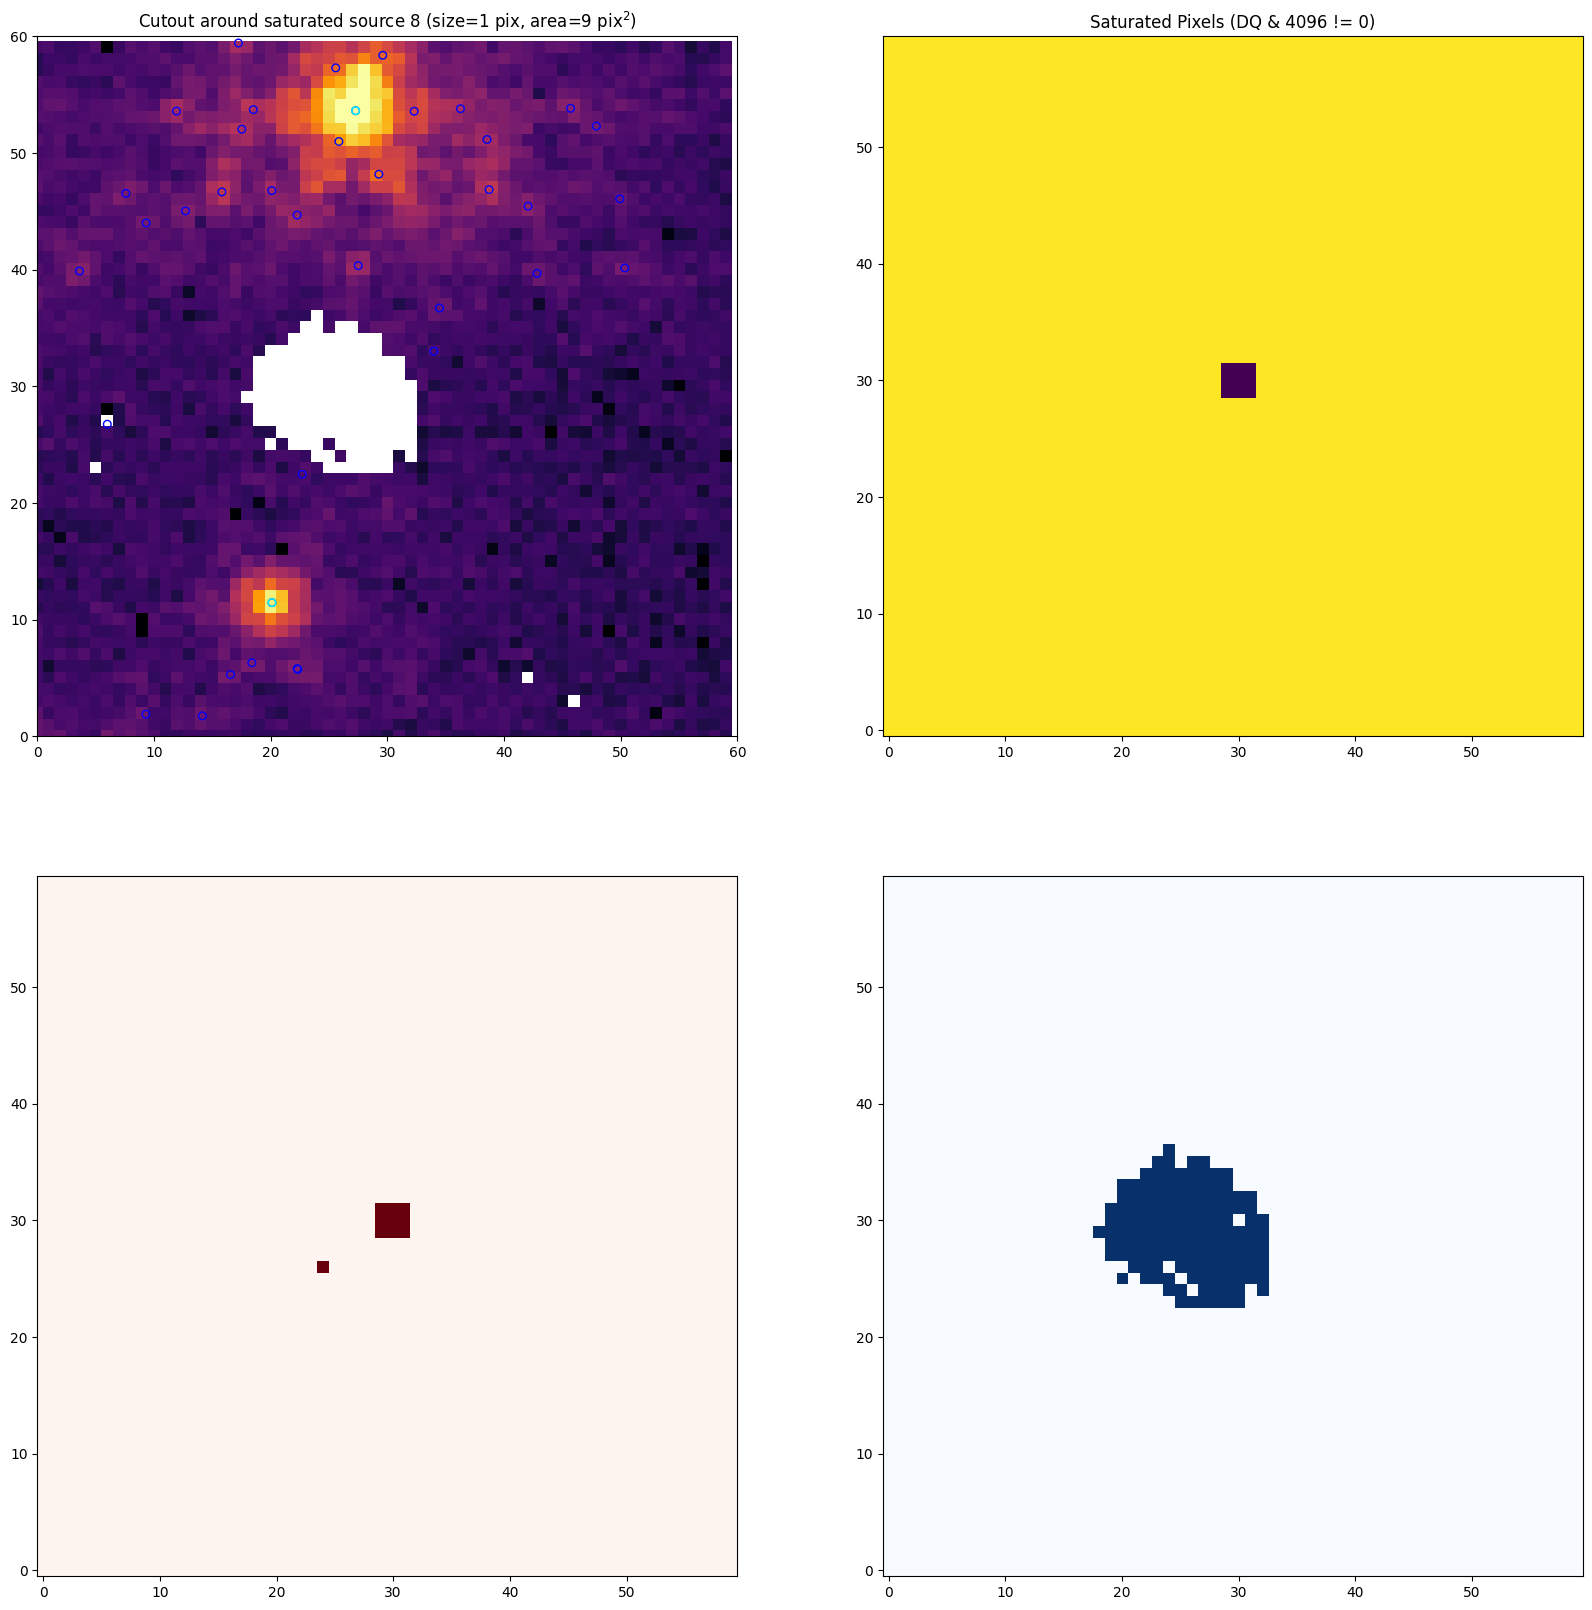

Source 9: center at (x, y) = (1477, 1170)


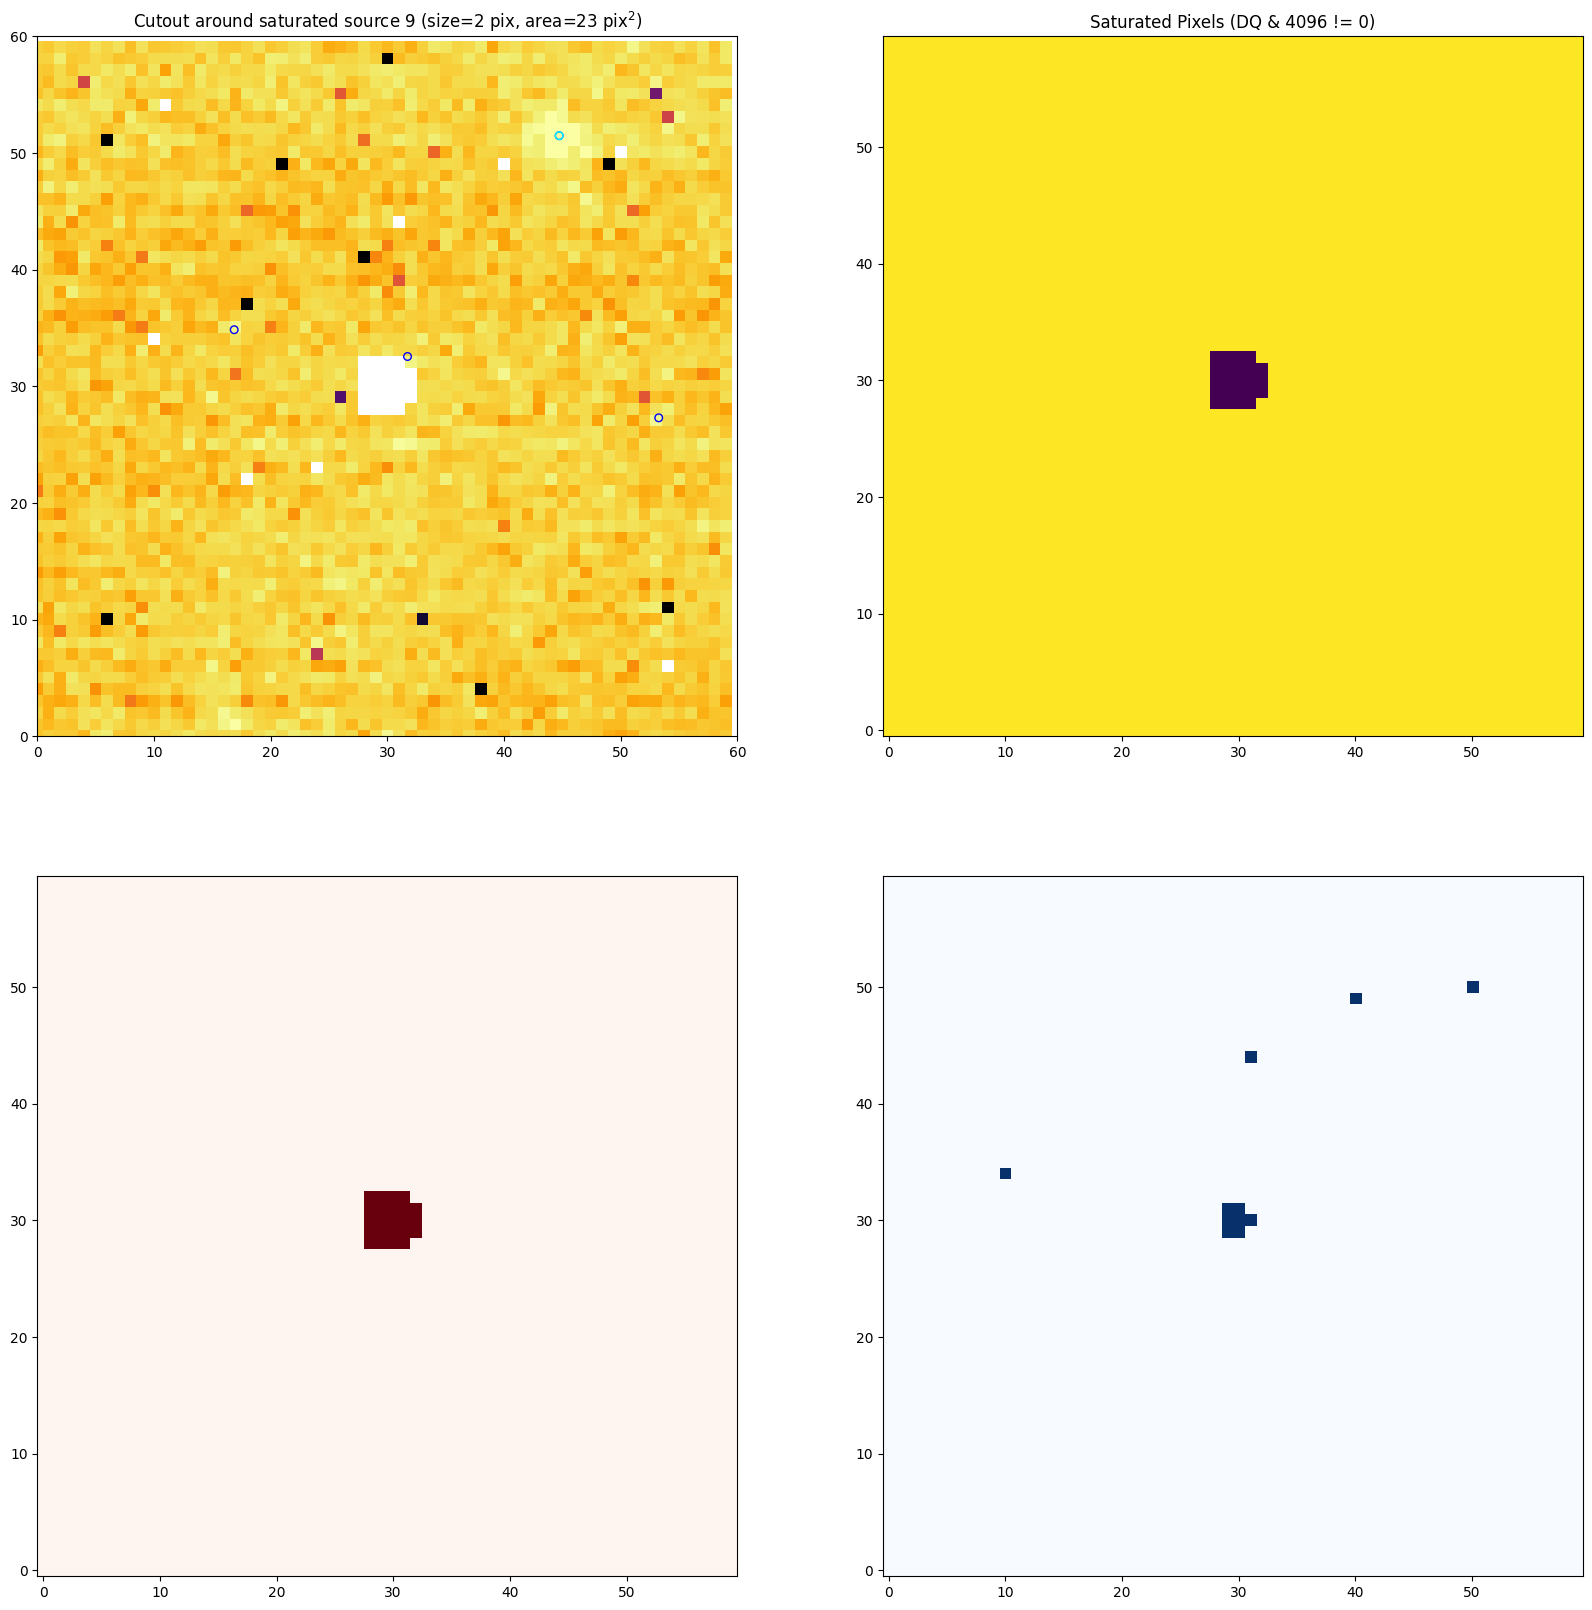

Source 10: center at (x, y) = (1997, 1535)


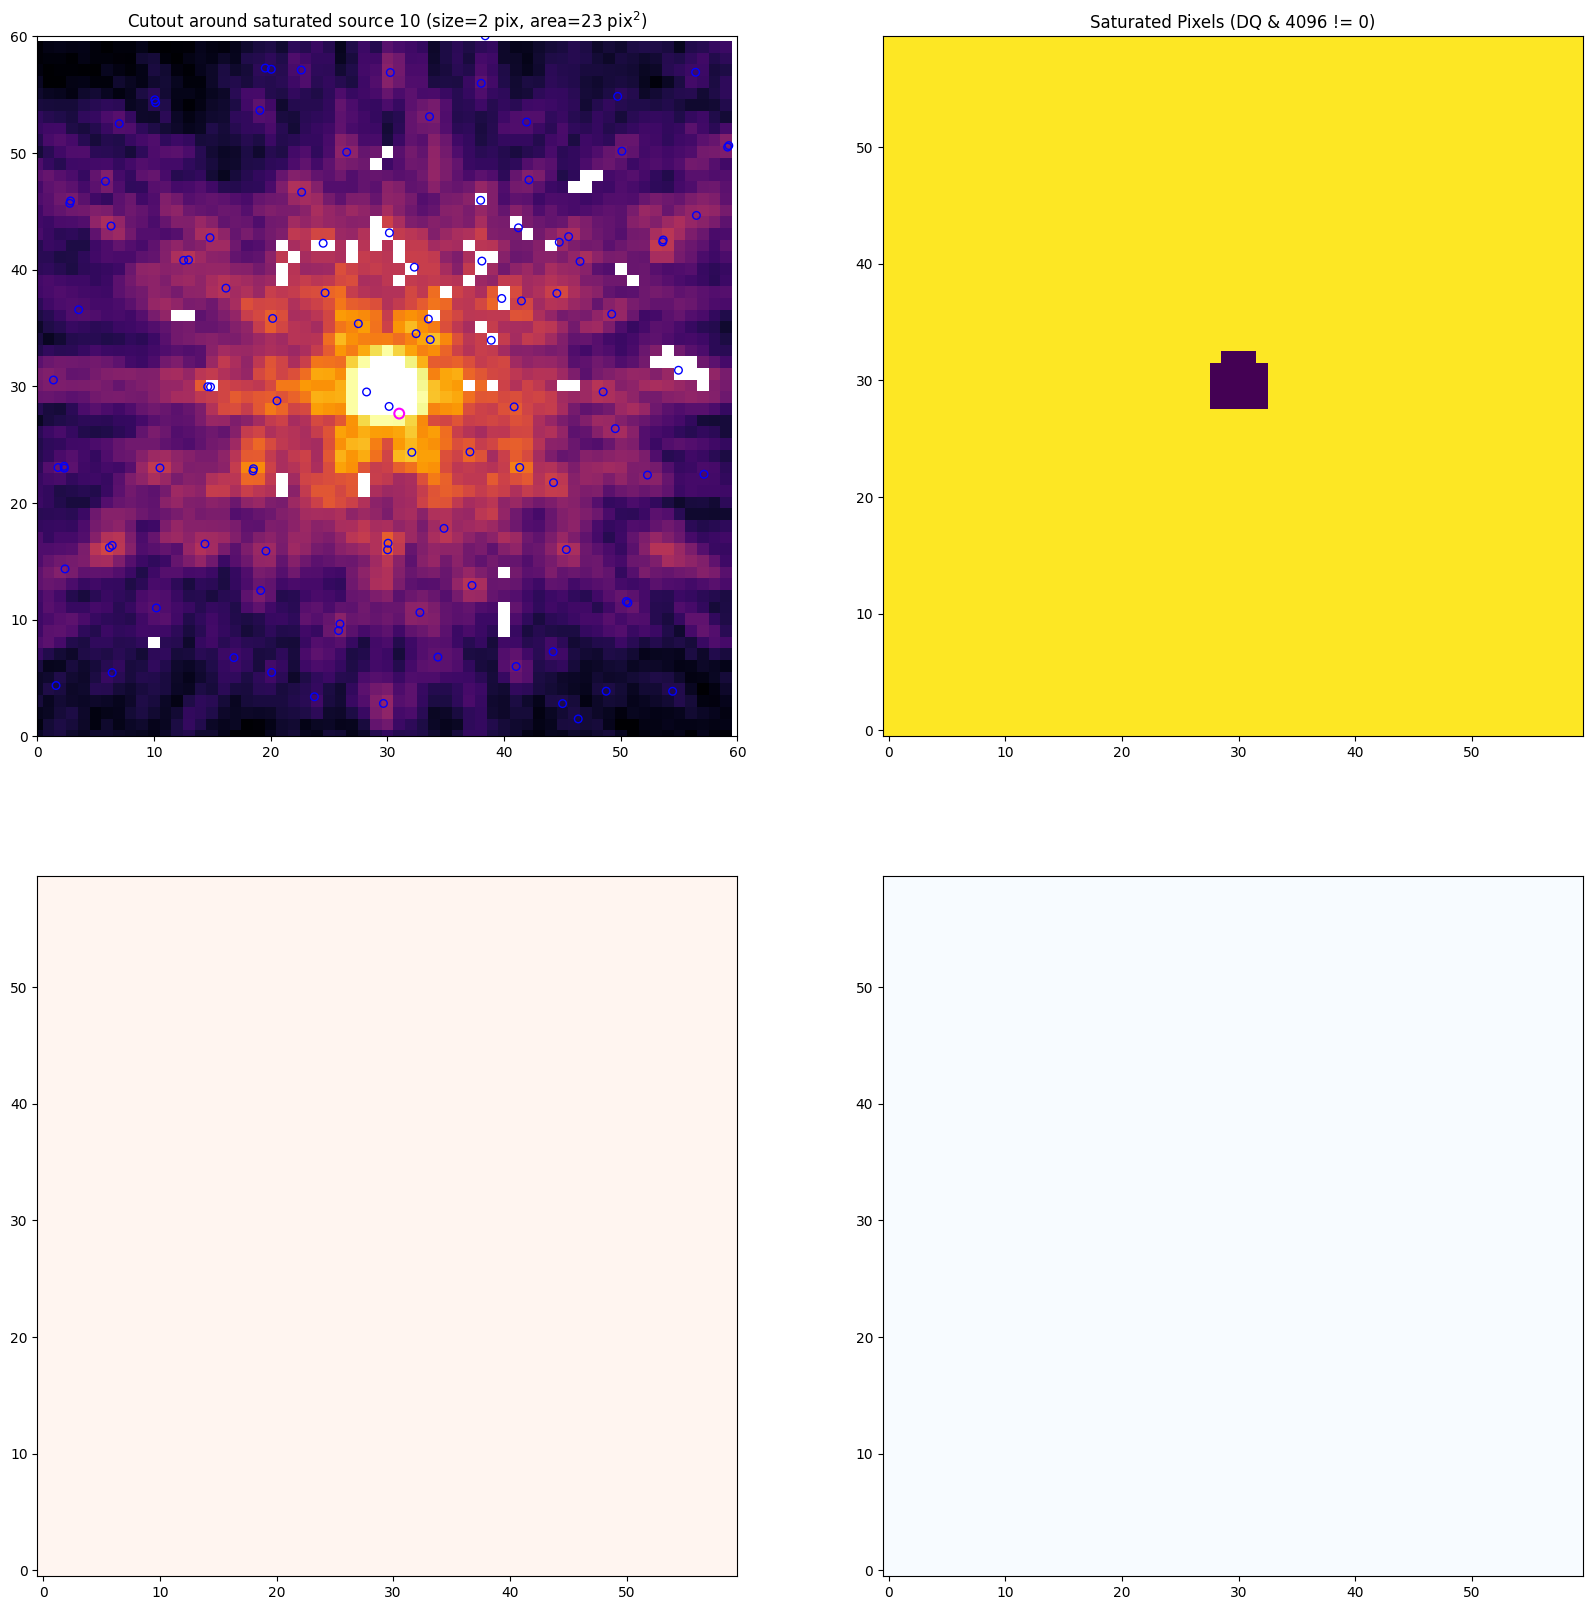

Source 11: center at (x, y) = (1014, 1784)


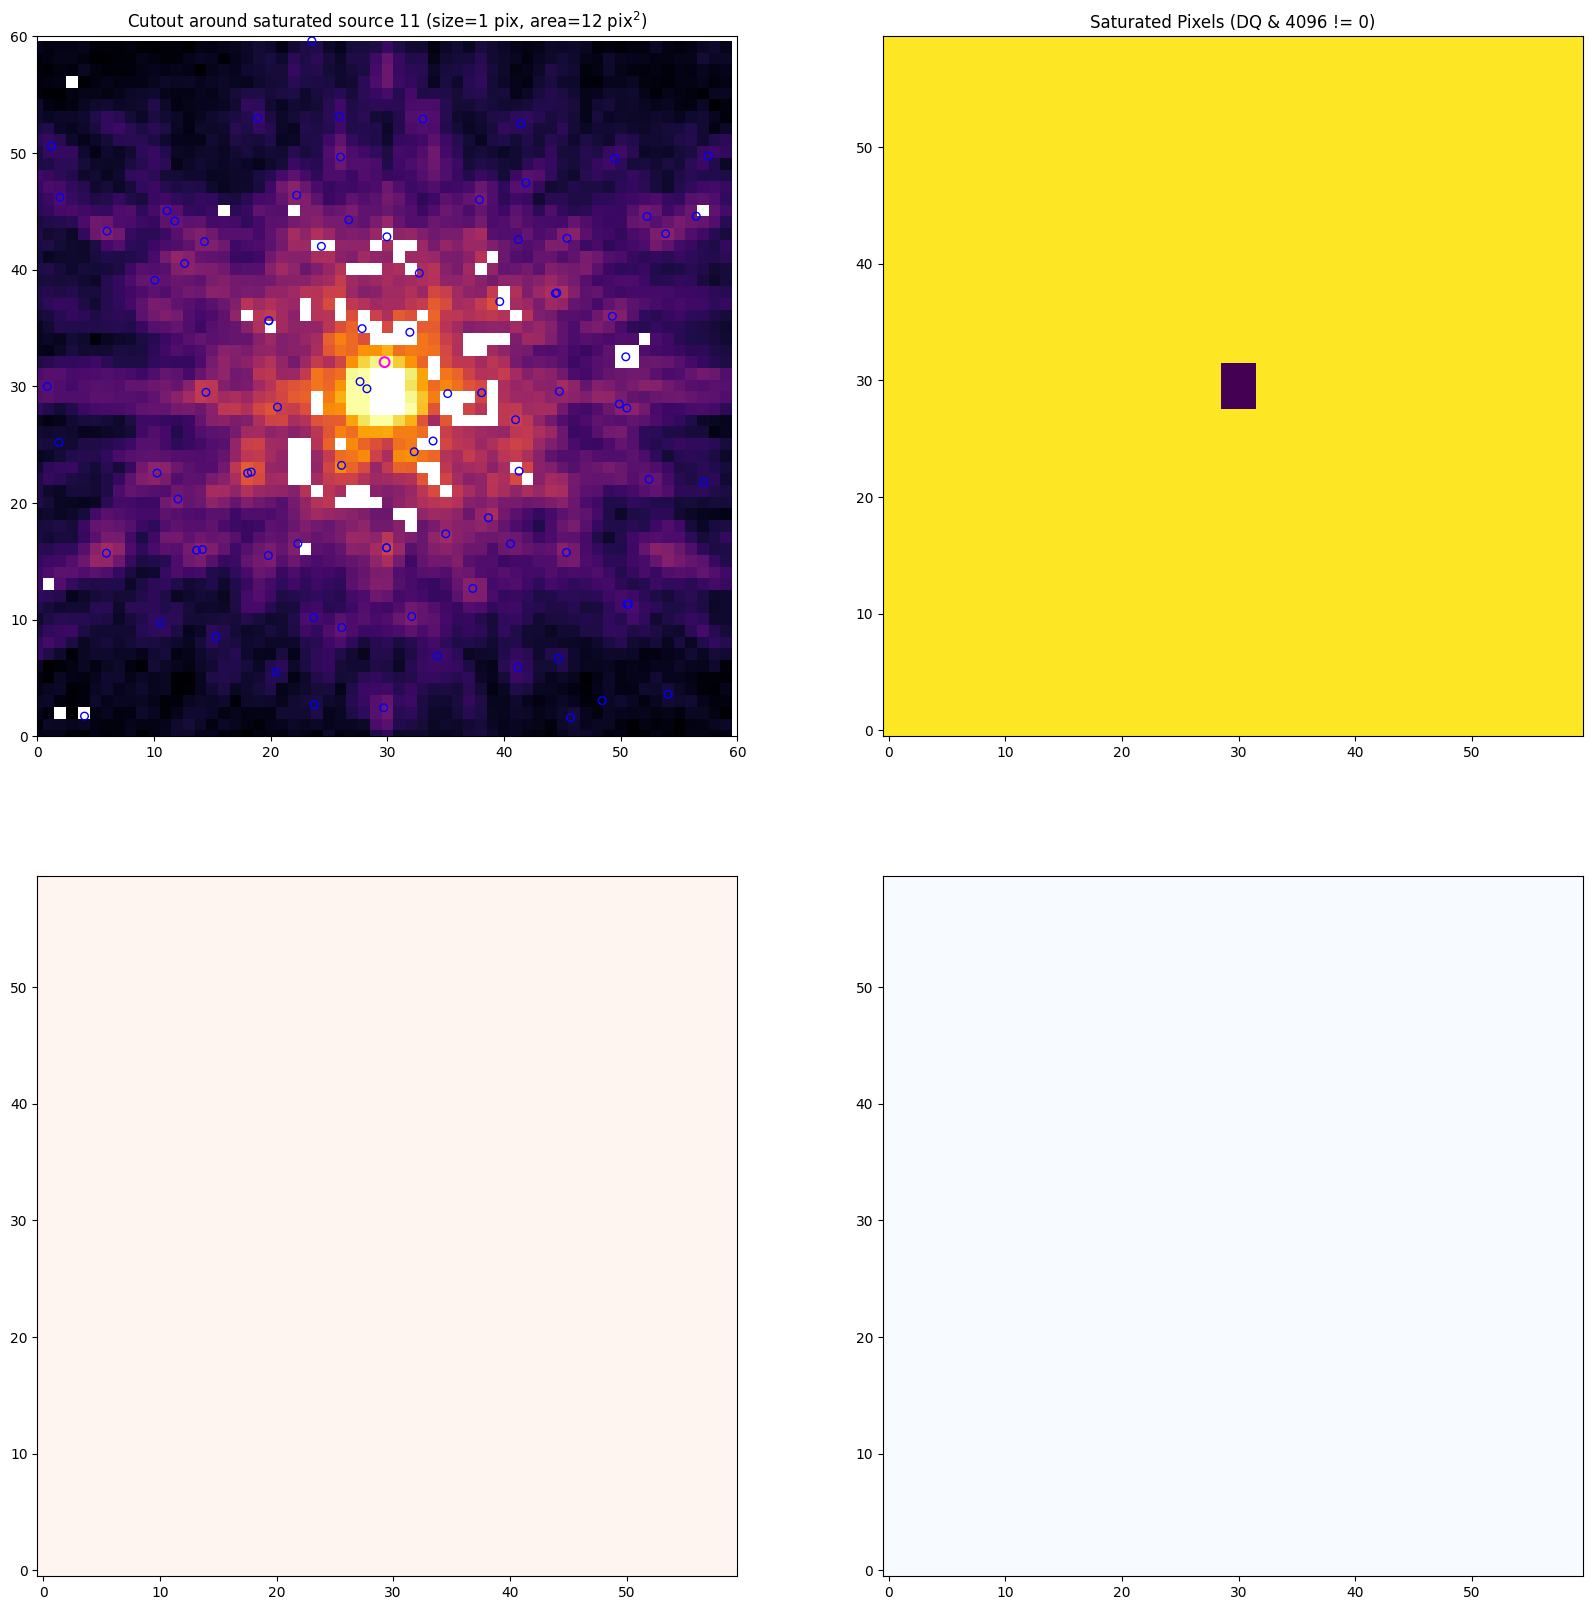

/orange/adamginsburg/jwst/w51/F140M/f140m_nrcb2_visit001_vgroup03109_exp00005_daophot_combined_with_satstars.fits
vgroup03109
3109


Set OBSGEO-B to   -25.279581 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611580292.983 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


3 sat stars from catalog
<SkyCoord (ICRS): (ra, dec) in deg
    [(290.95451927, 14.50109505), (290.95108482, 14.49681536),
     (290.94792433, 14.48792795)]>
9 number of saturated sources found
Found 0 NaN DQ pixels


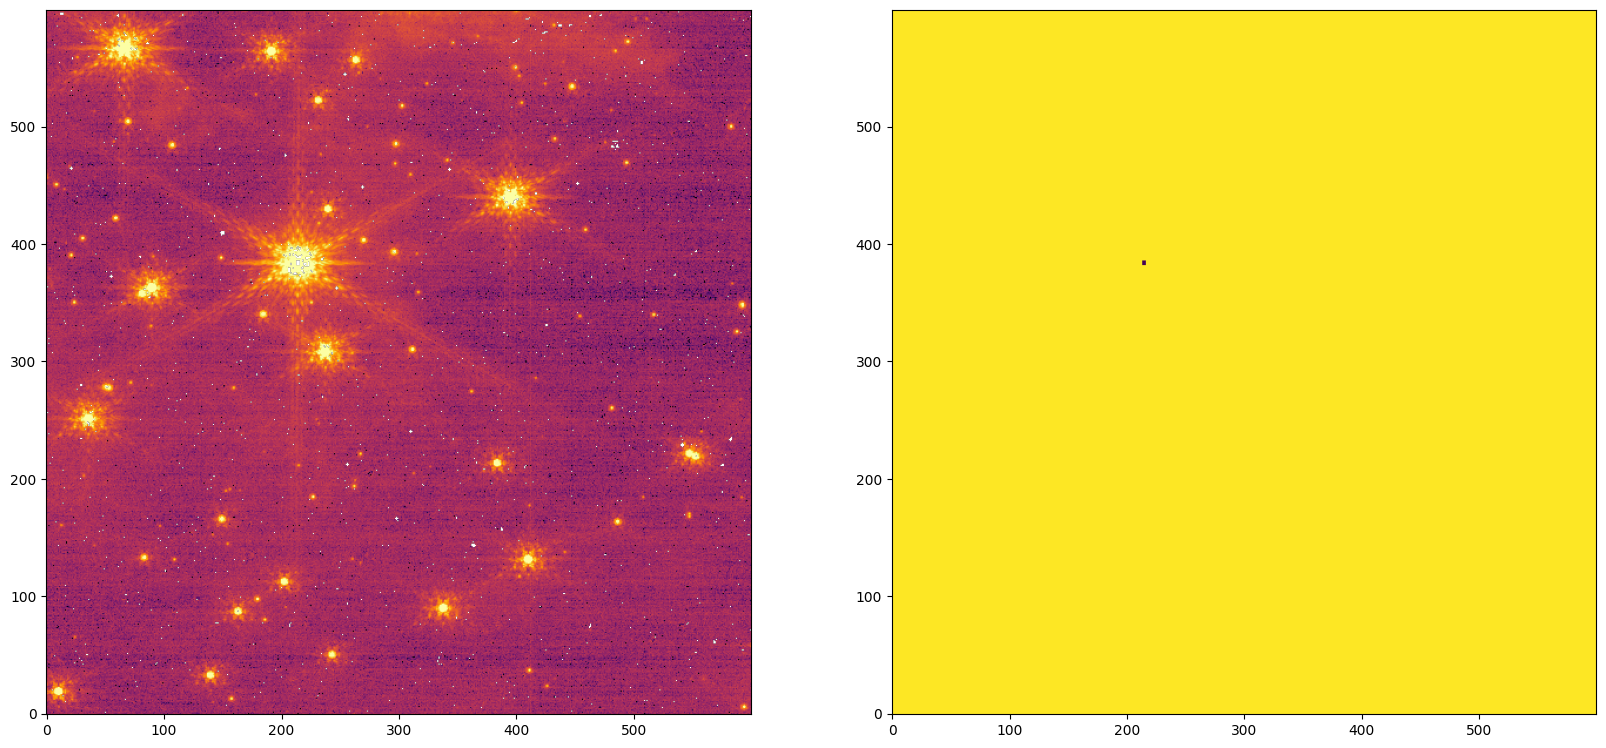

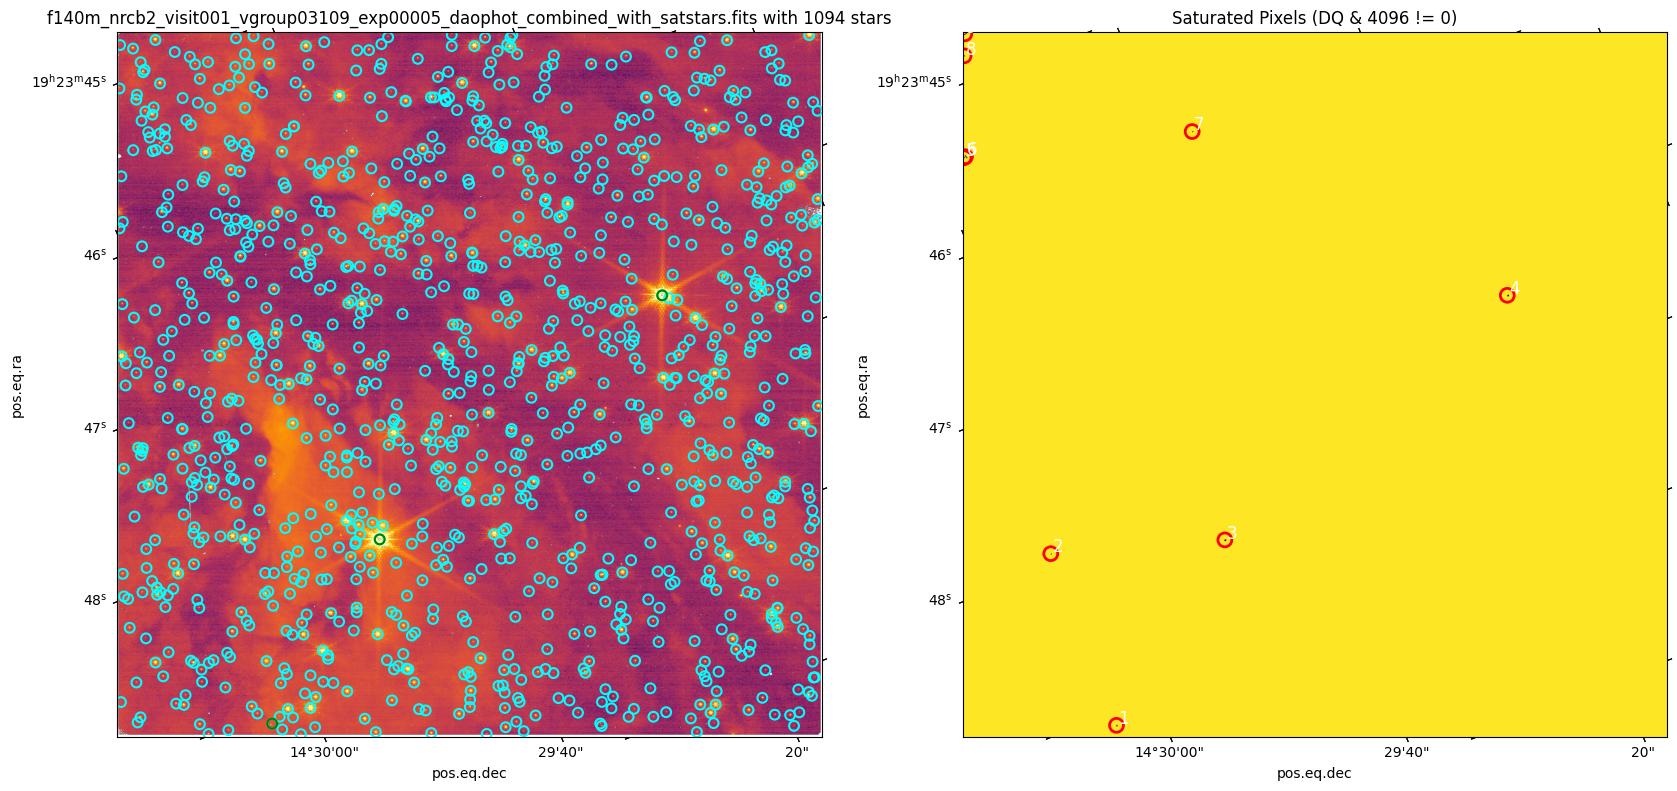

Source 1: center at (x, y) = (447, 32)


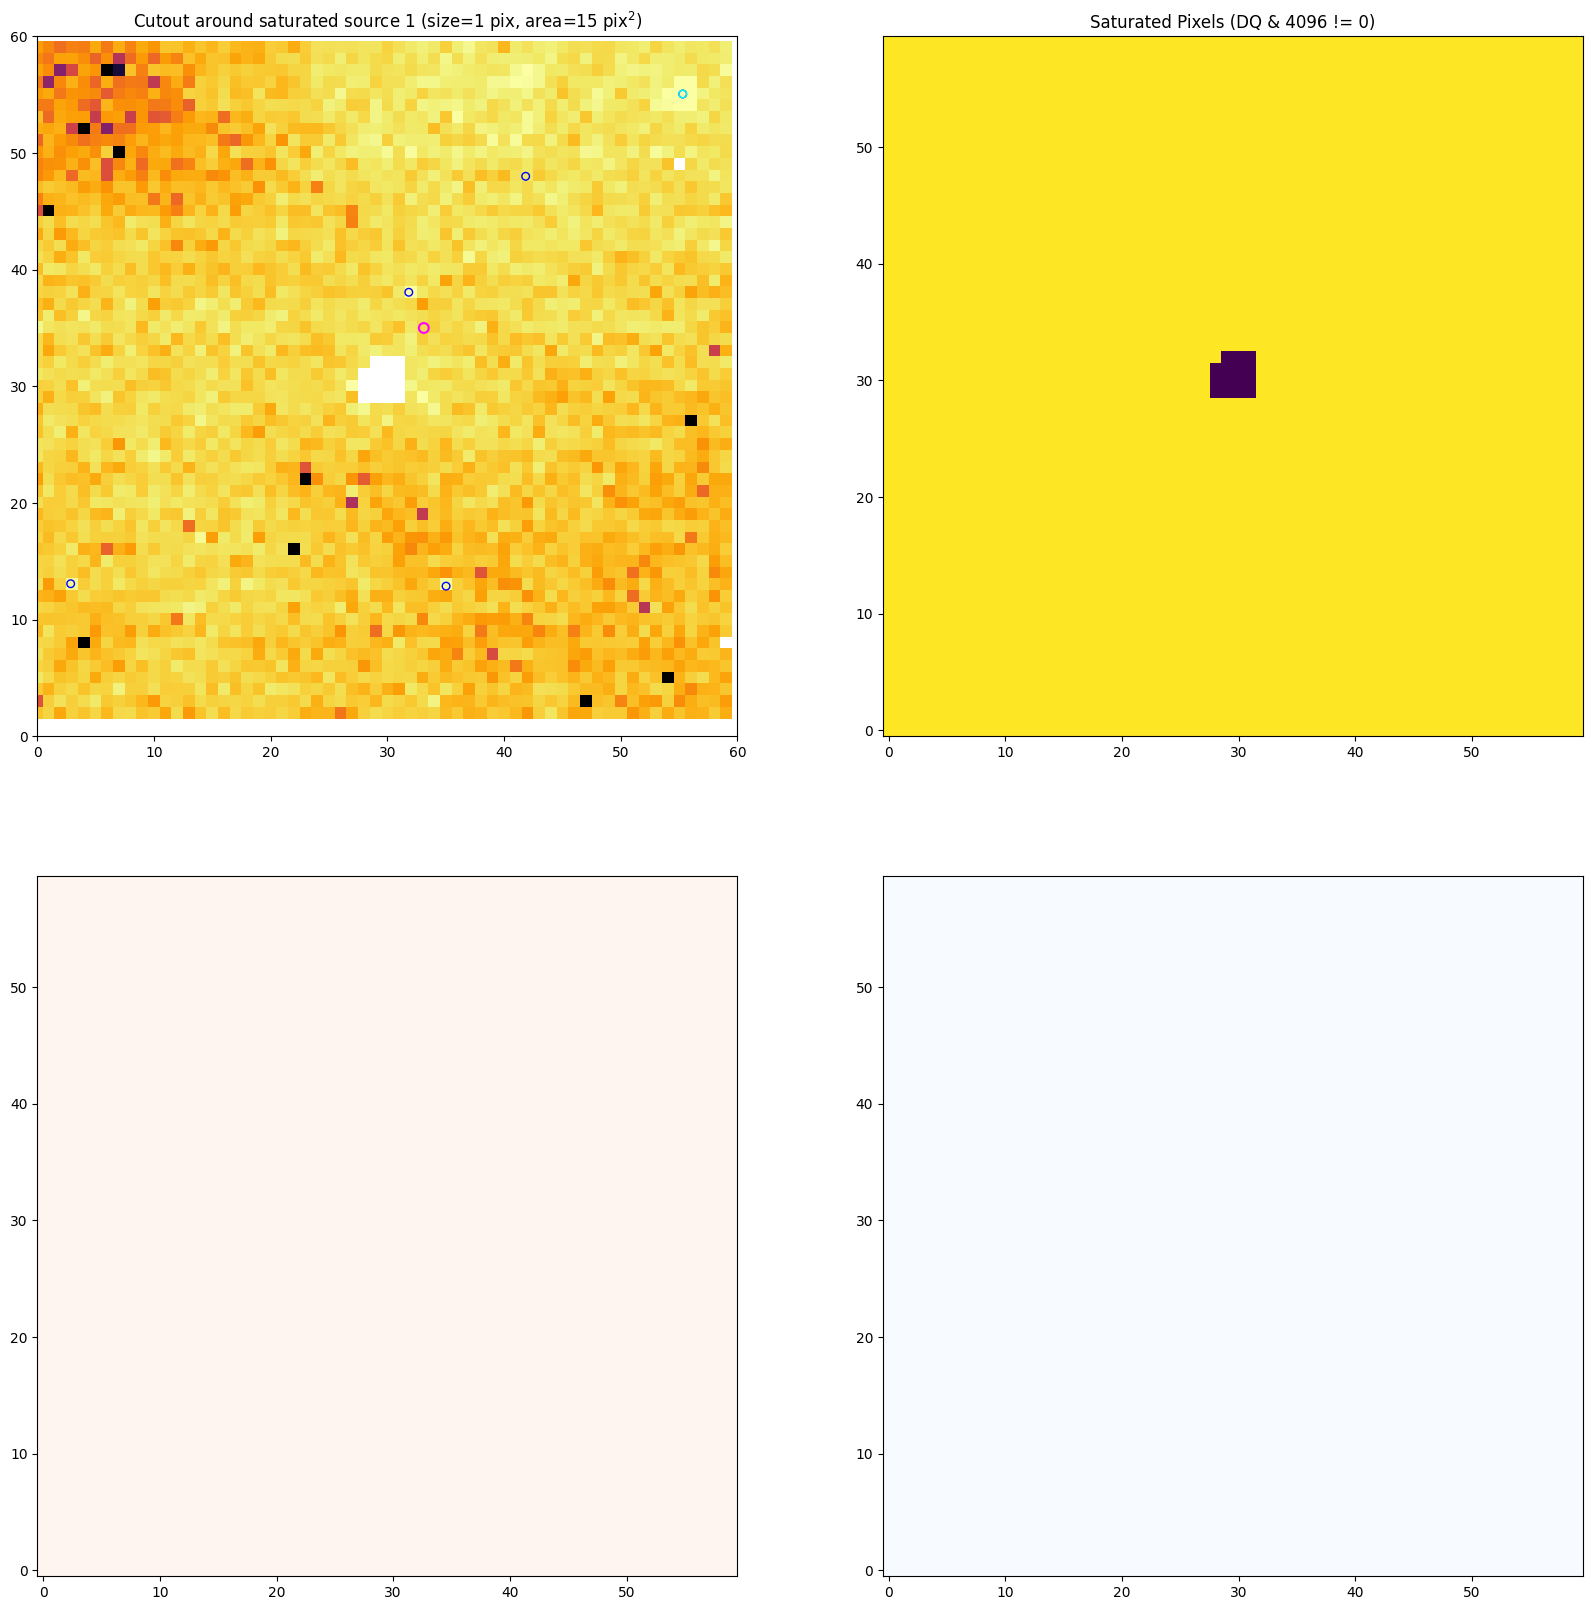

Source 2: center at (x, y) = (256, 531)


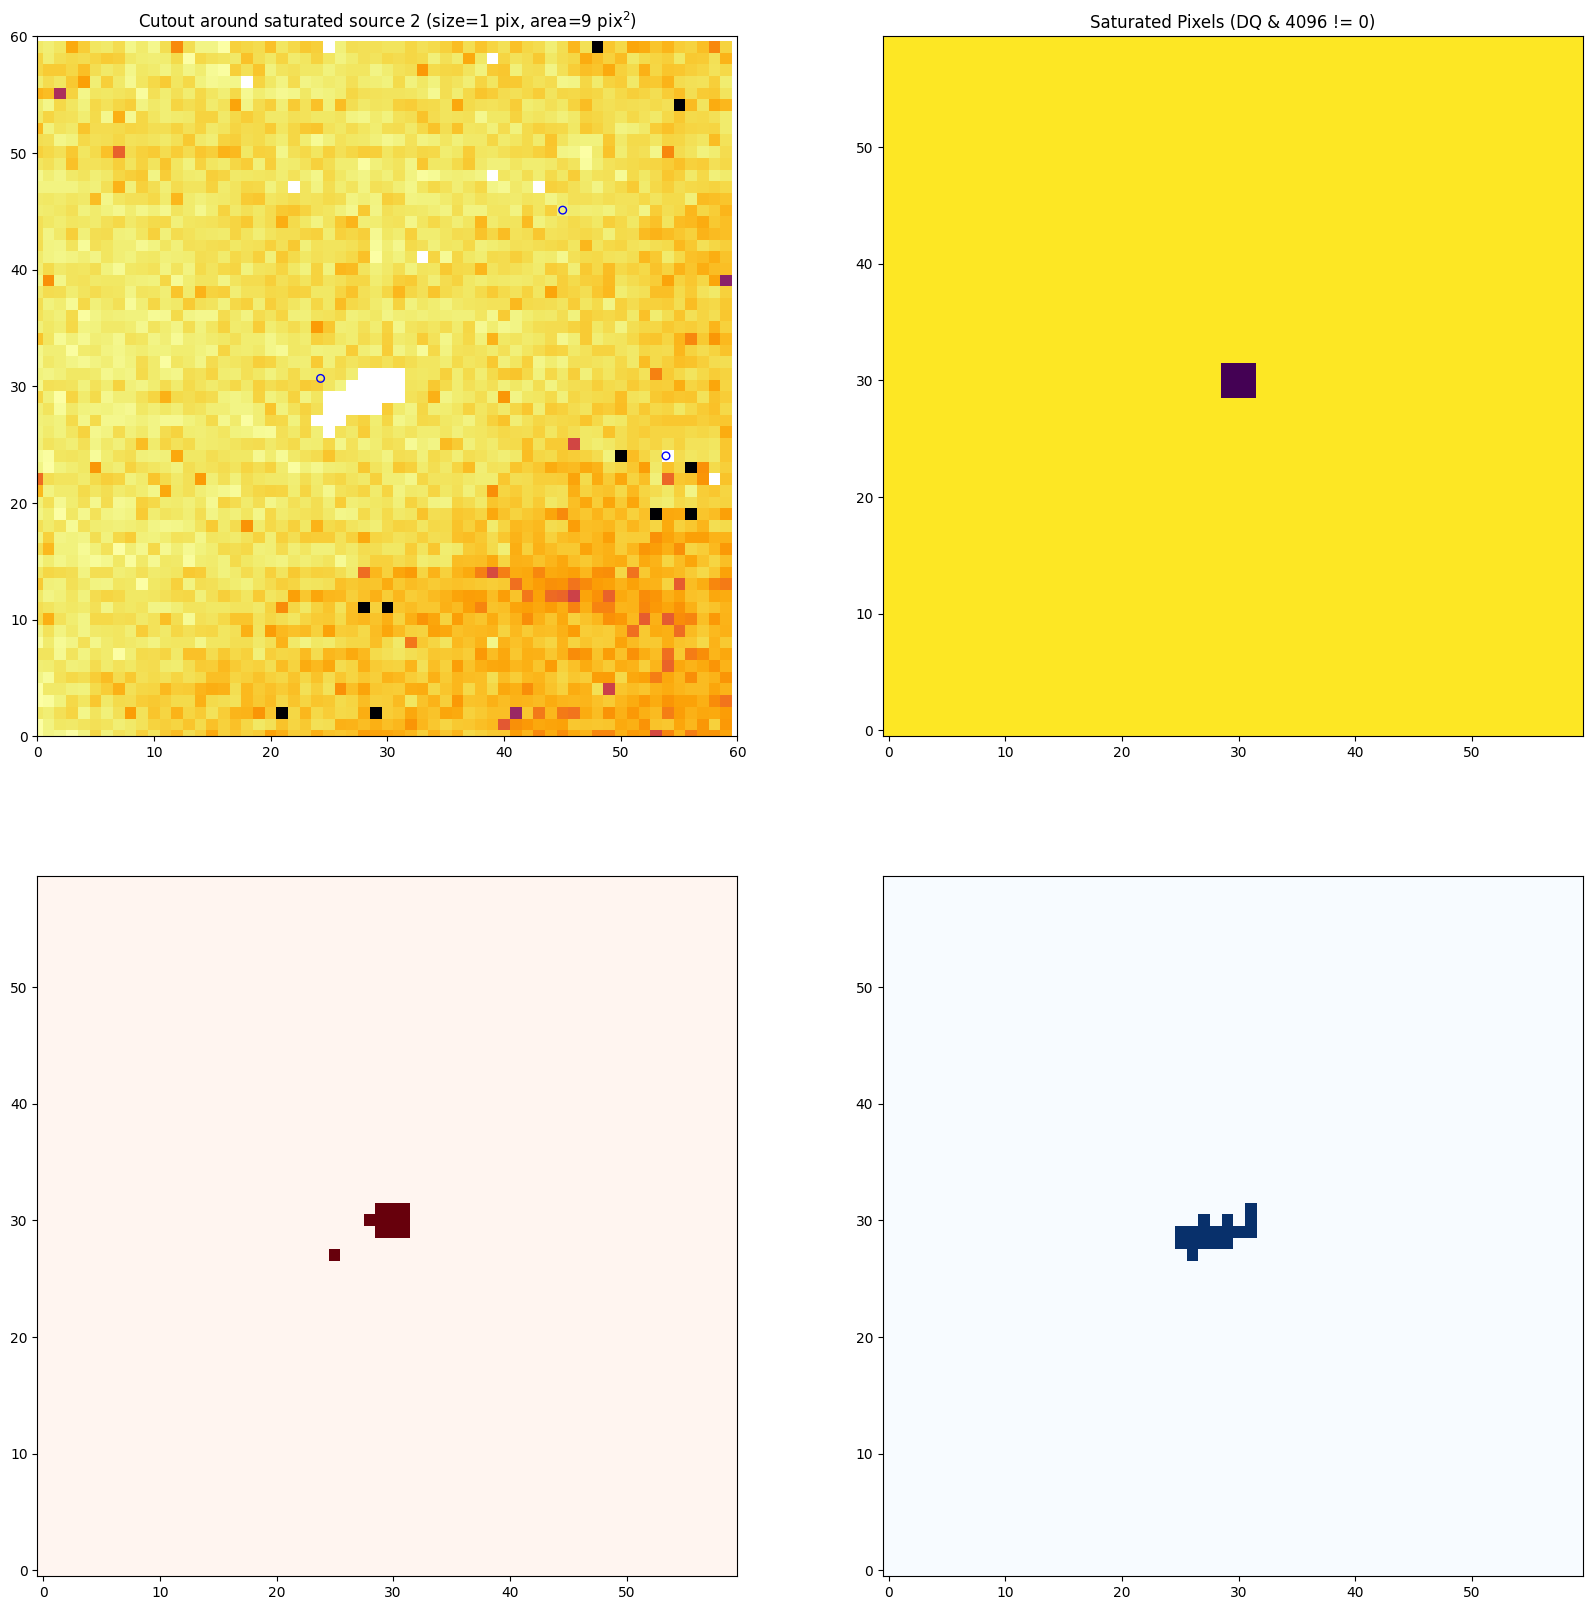

Source 3: center at (x, y) = (762, 571)


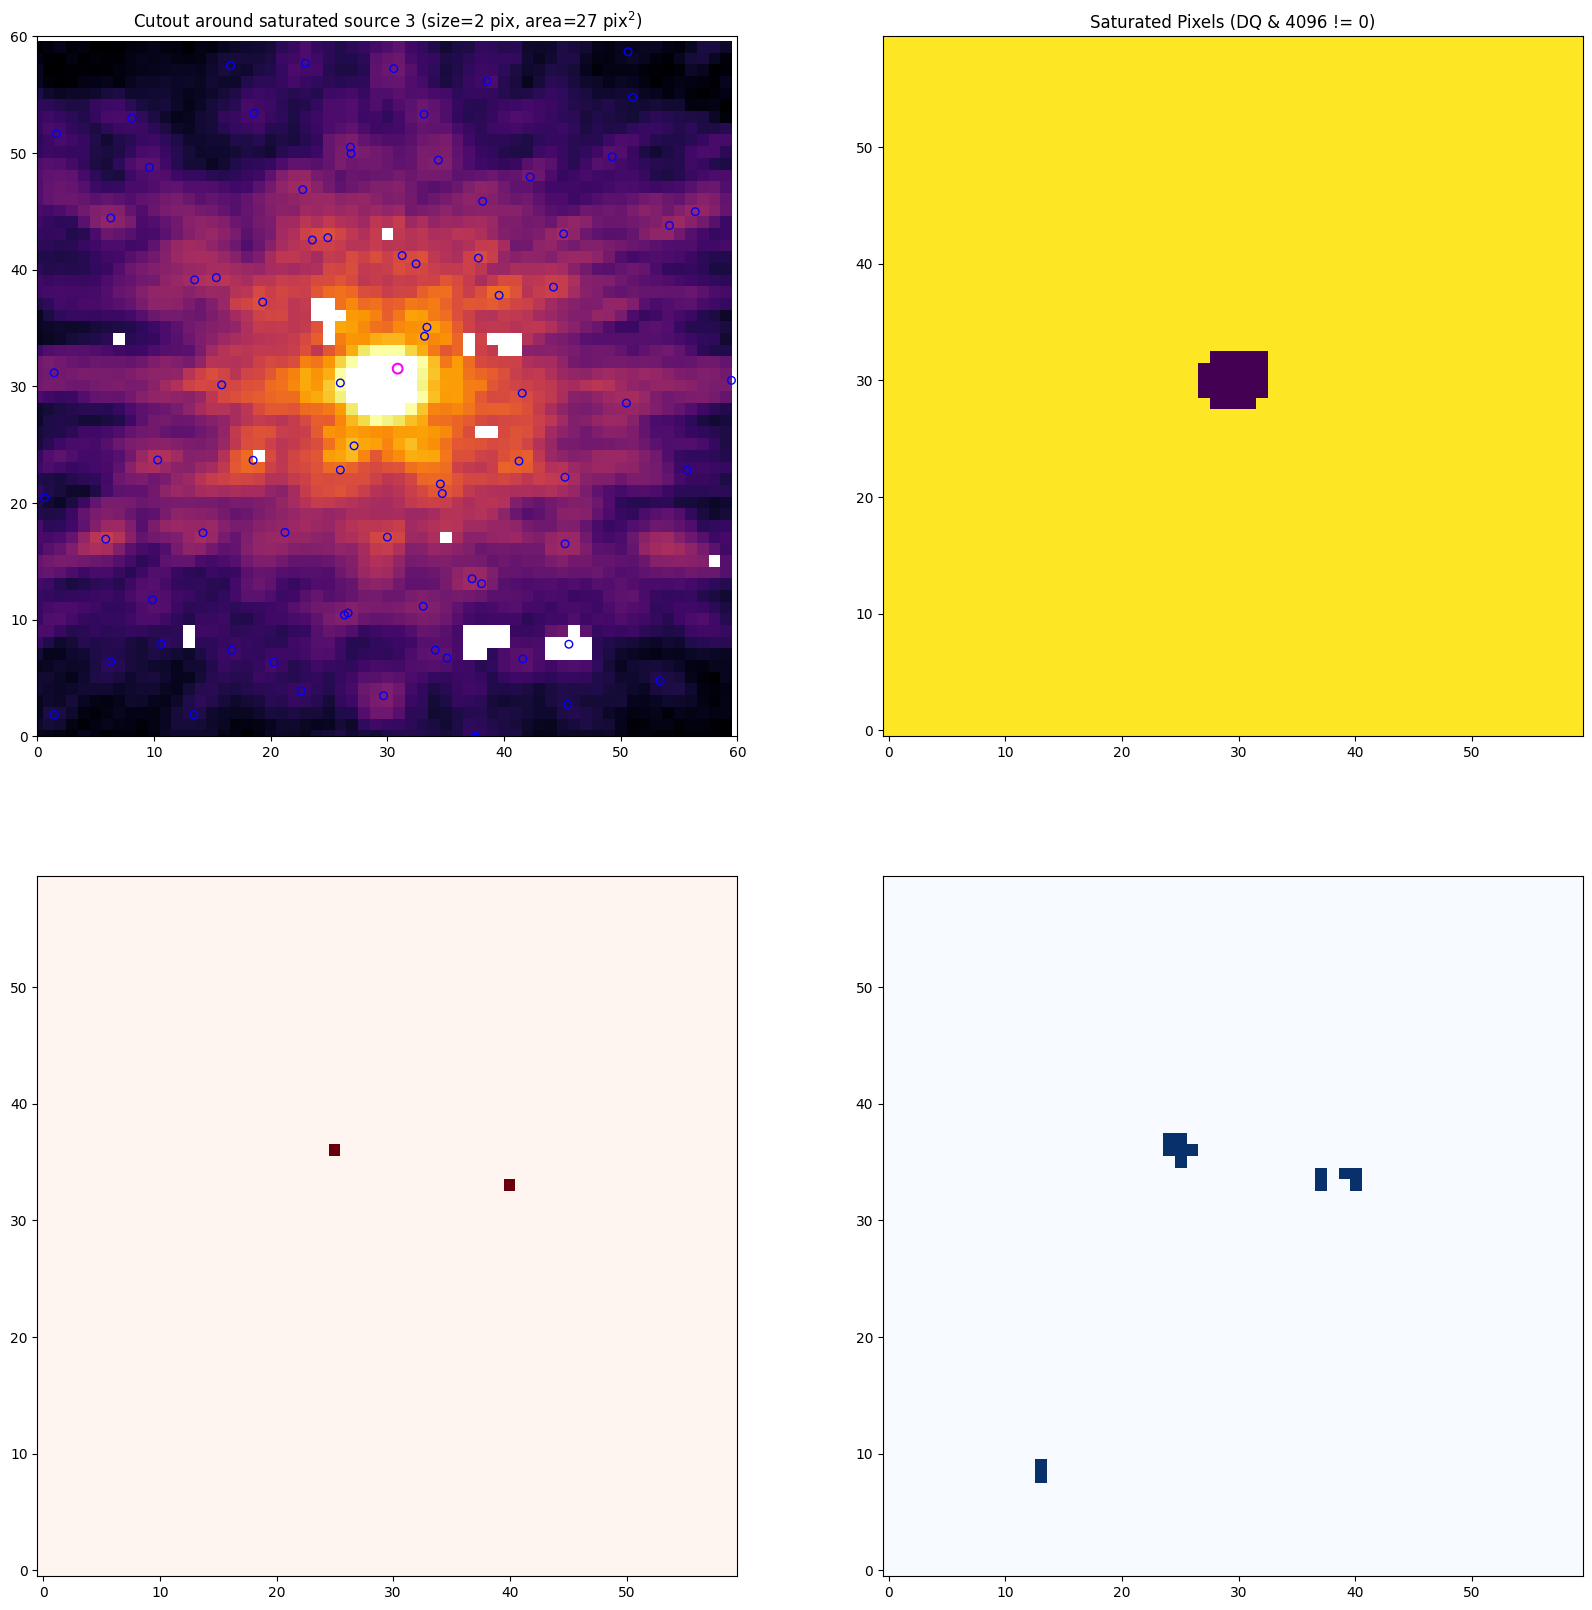

Source 4: center at (x, y) = (1583, 1282)


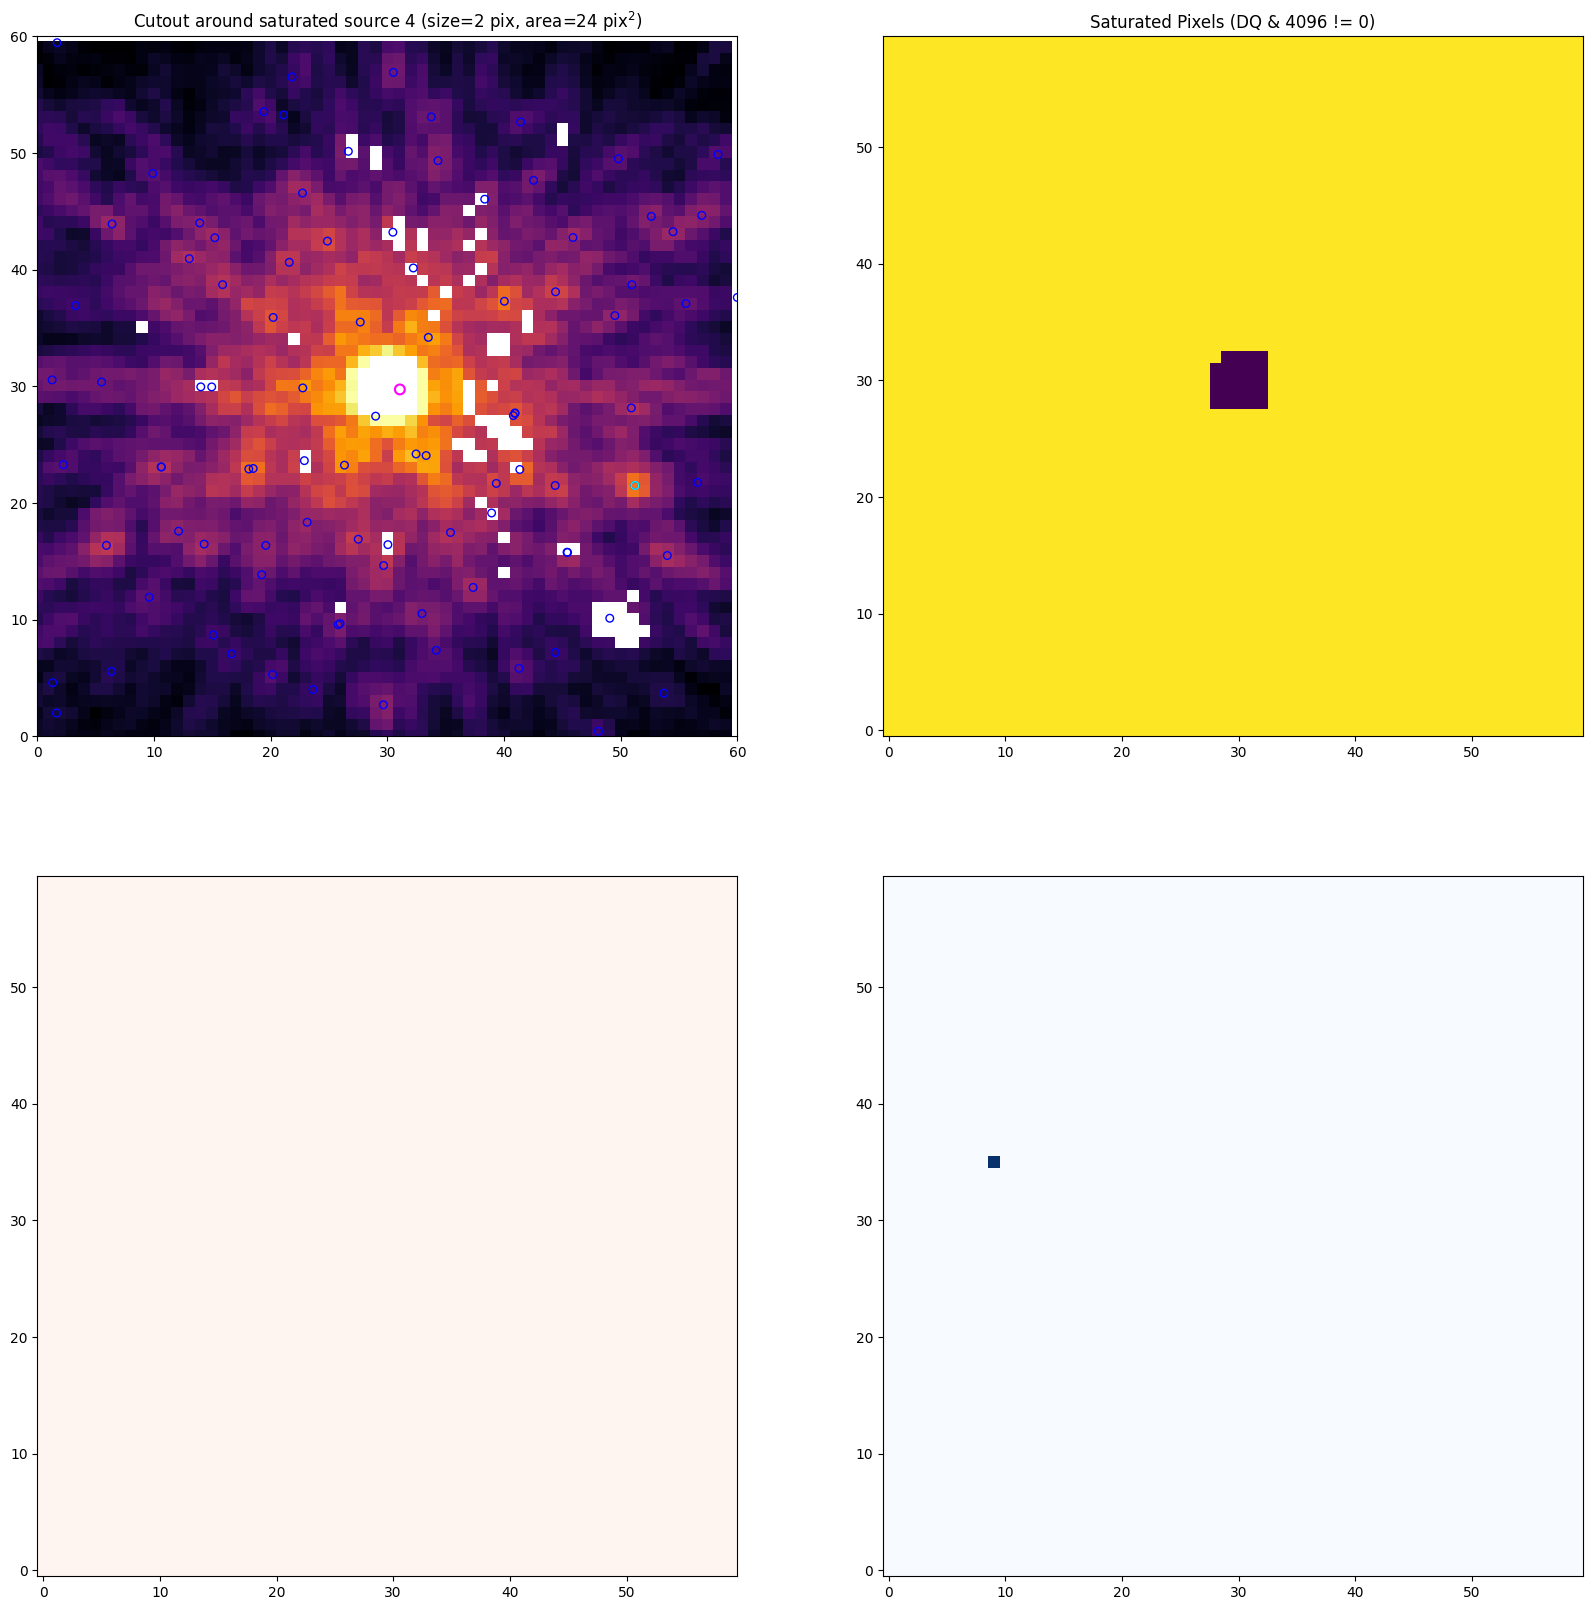

Source 5: center at (x, y) = (4, 1682)


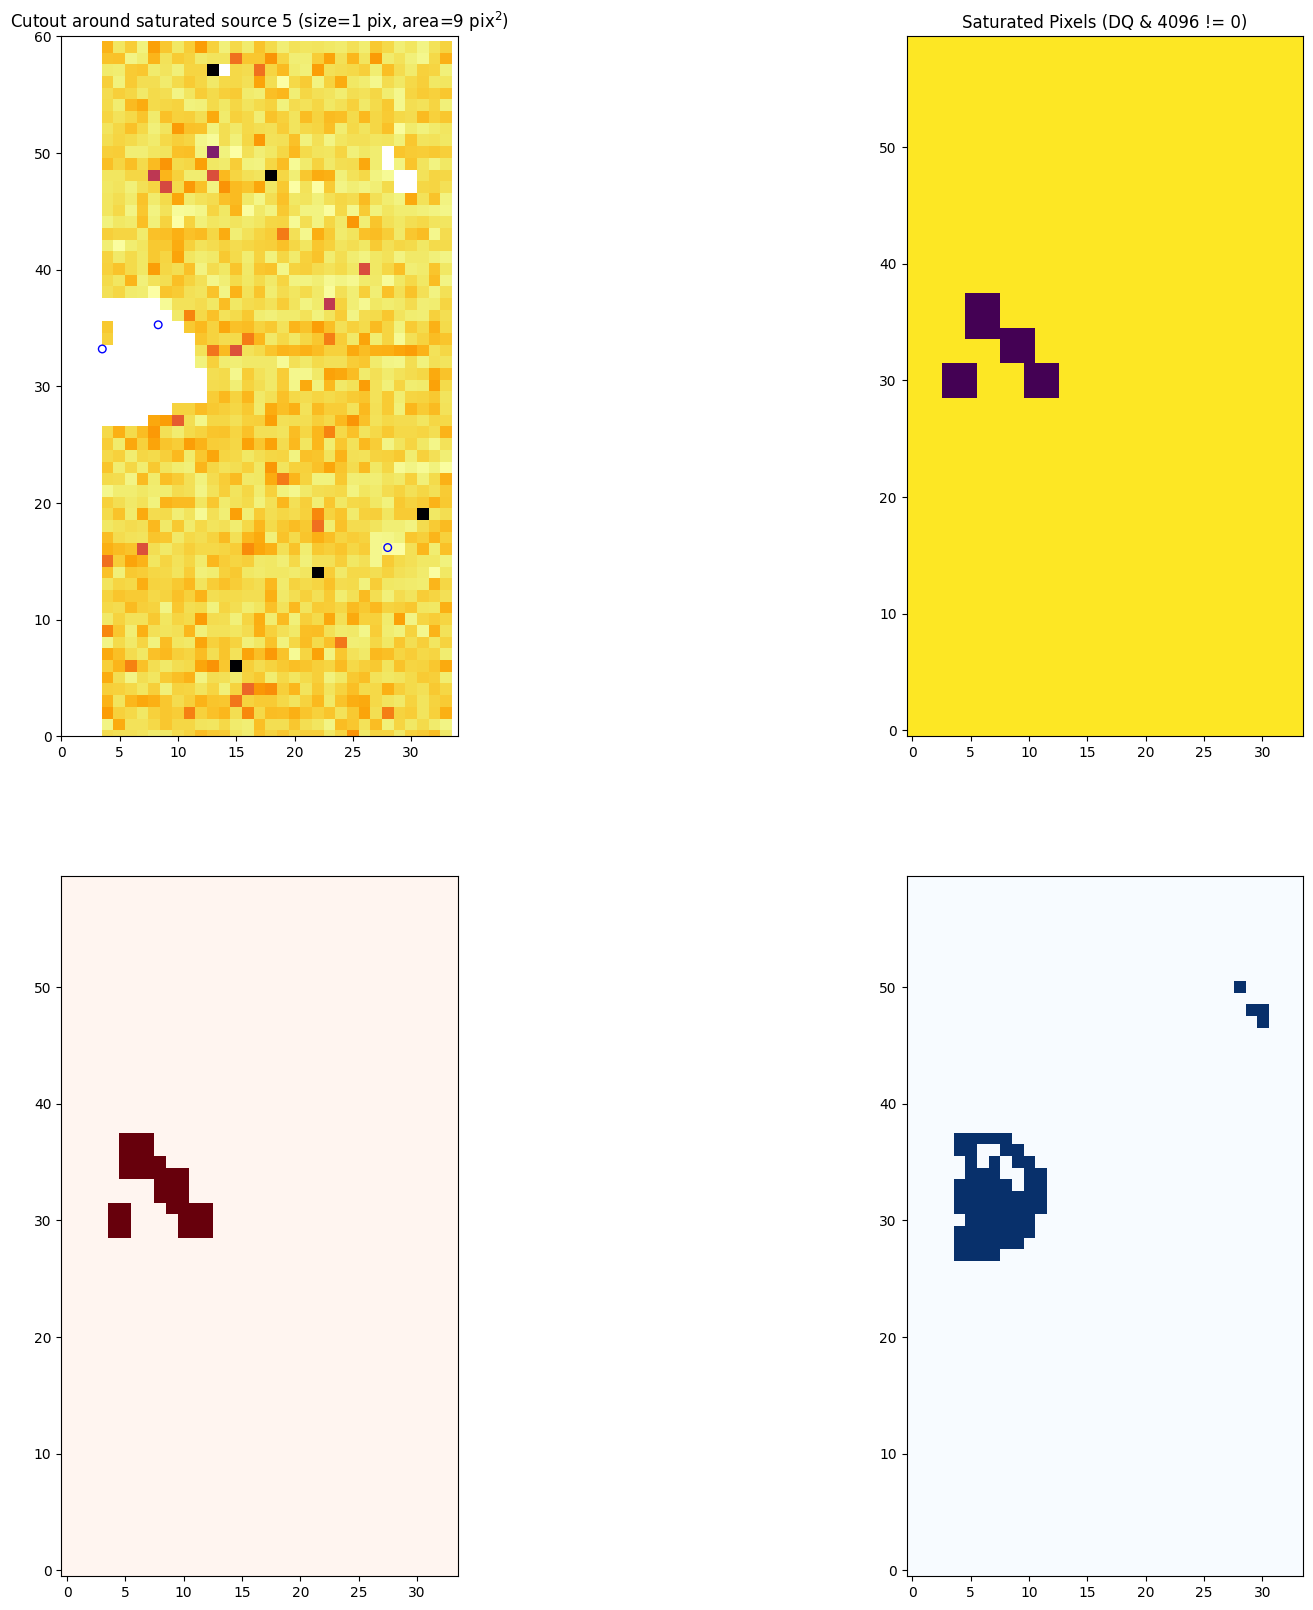

Source 6: center at (x, y) = (8, 1685)


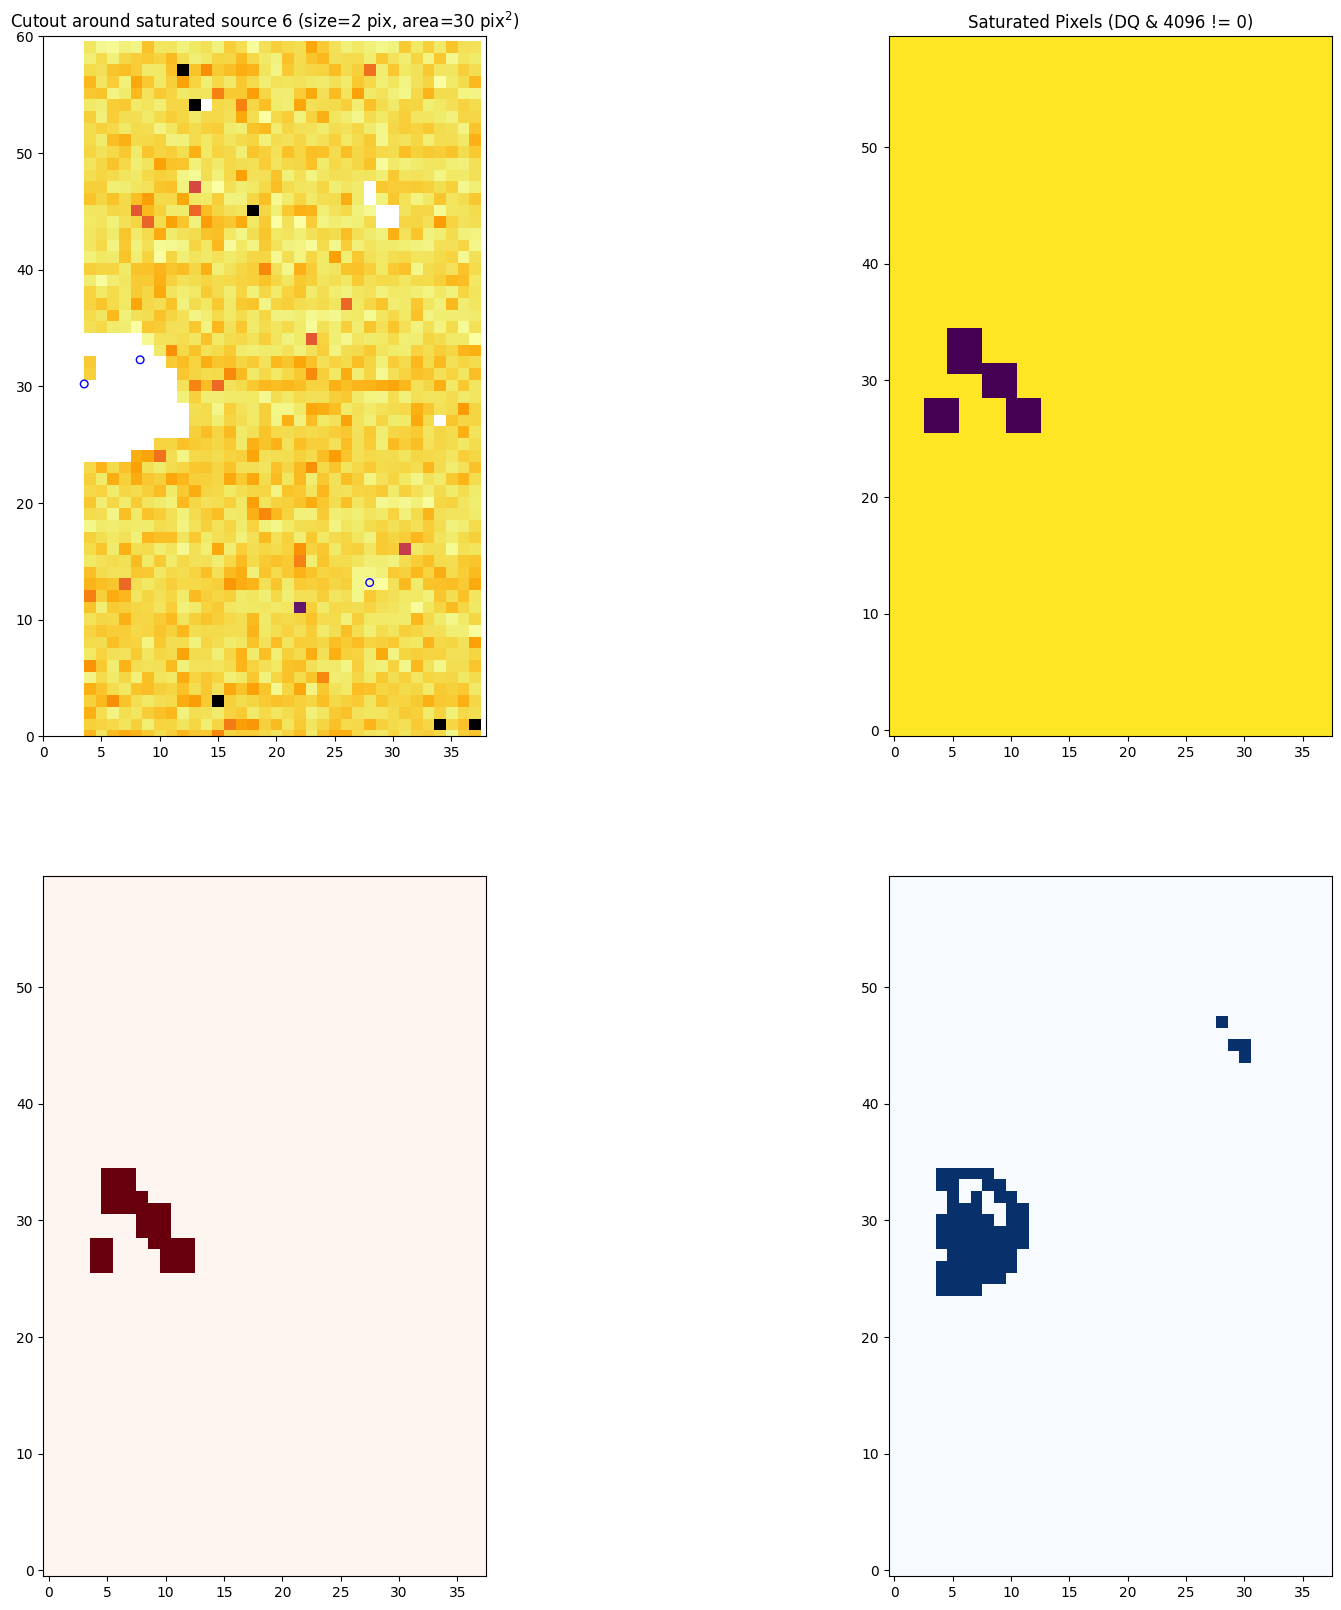

Source 7: center at (x, y) = (667, 1758)


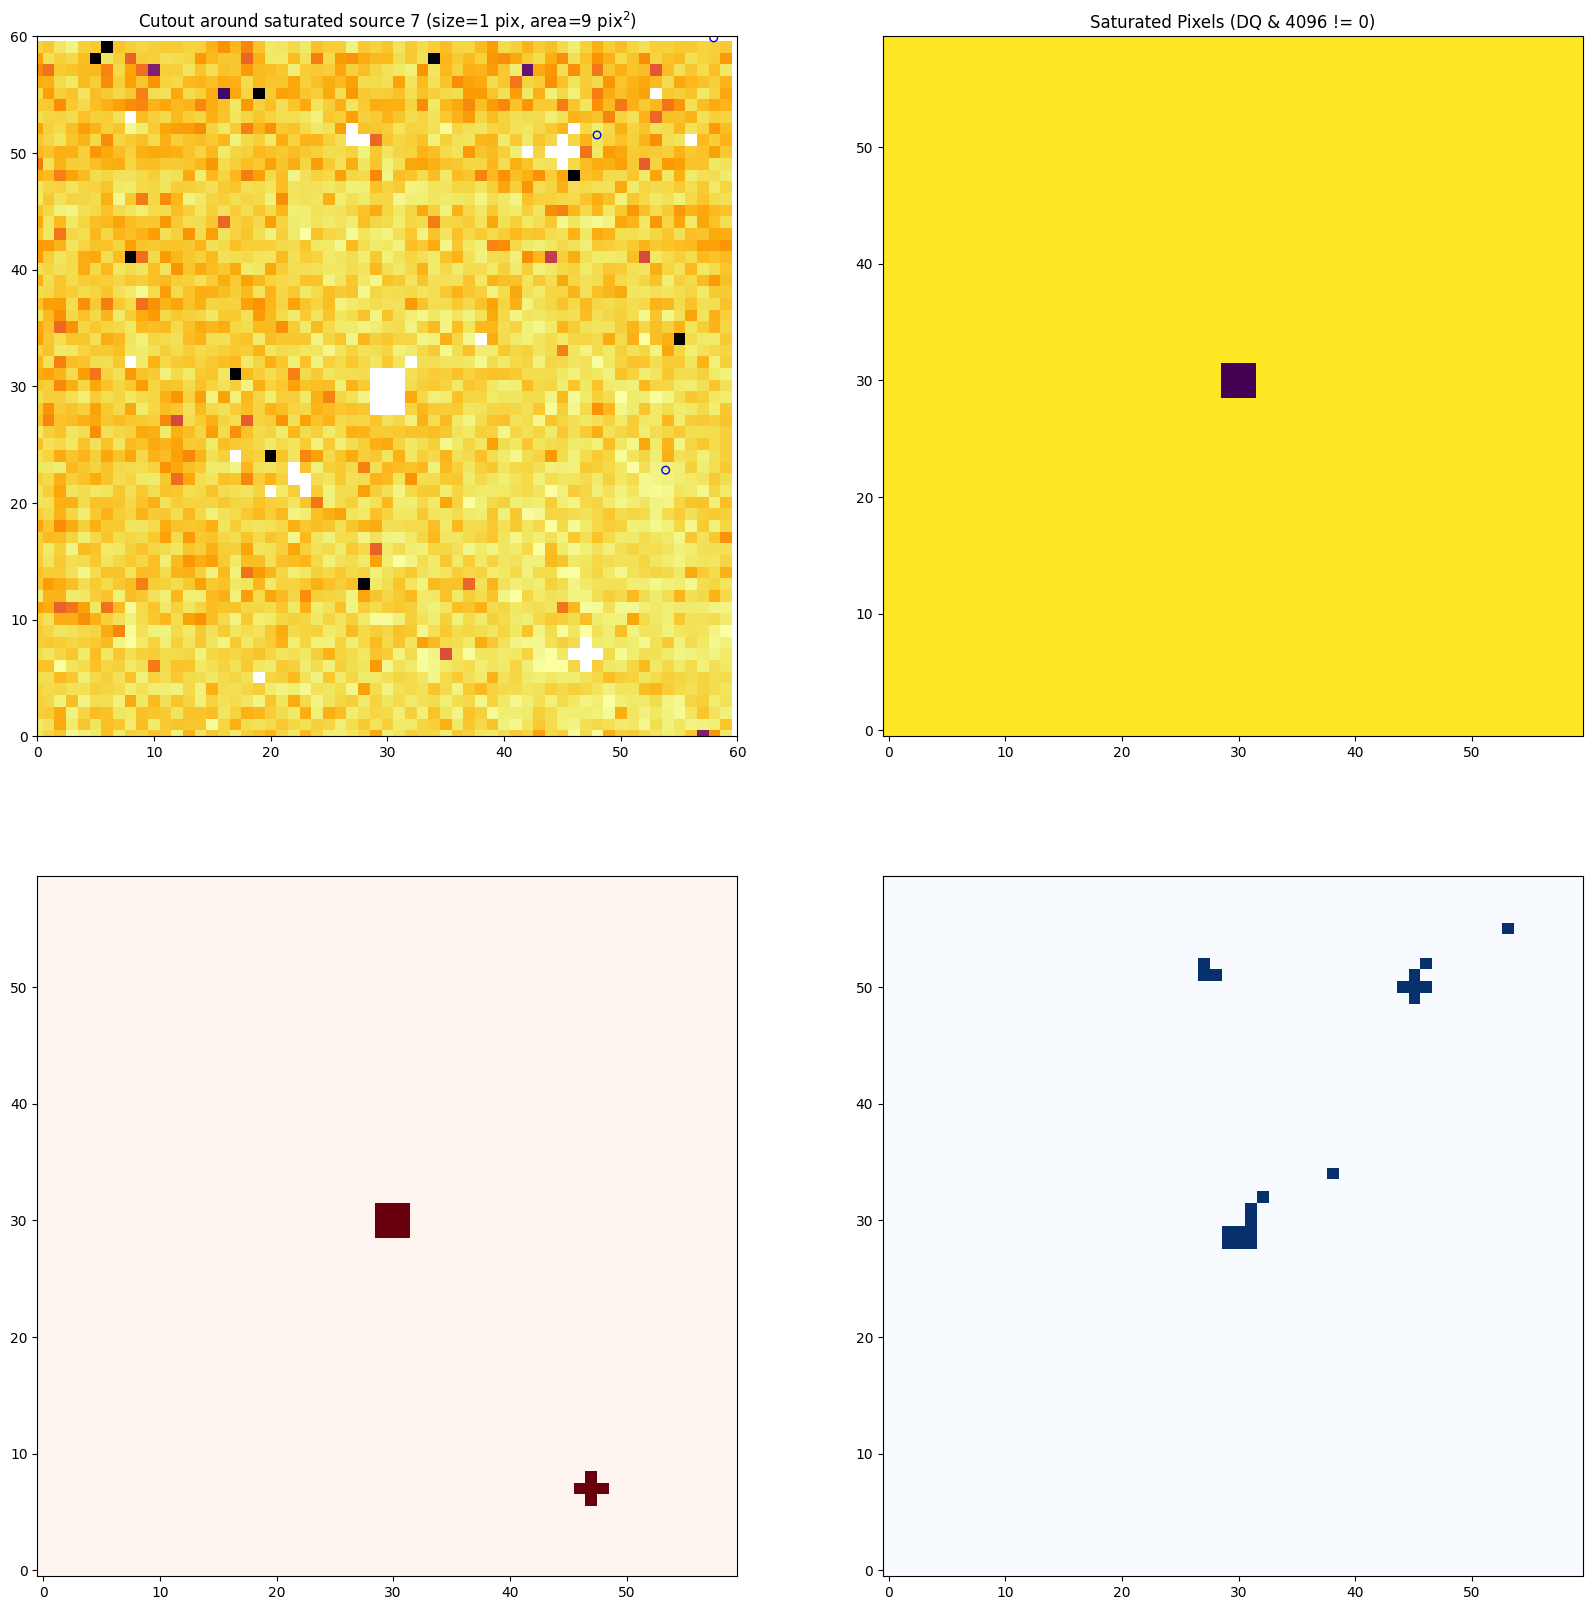

Source 8: center at (x, y) = (4, 1978)


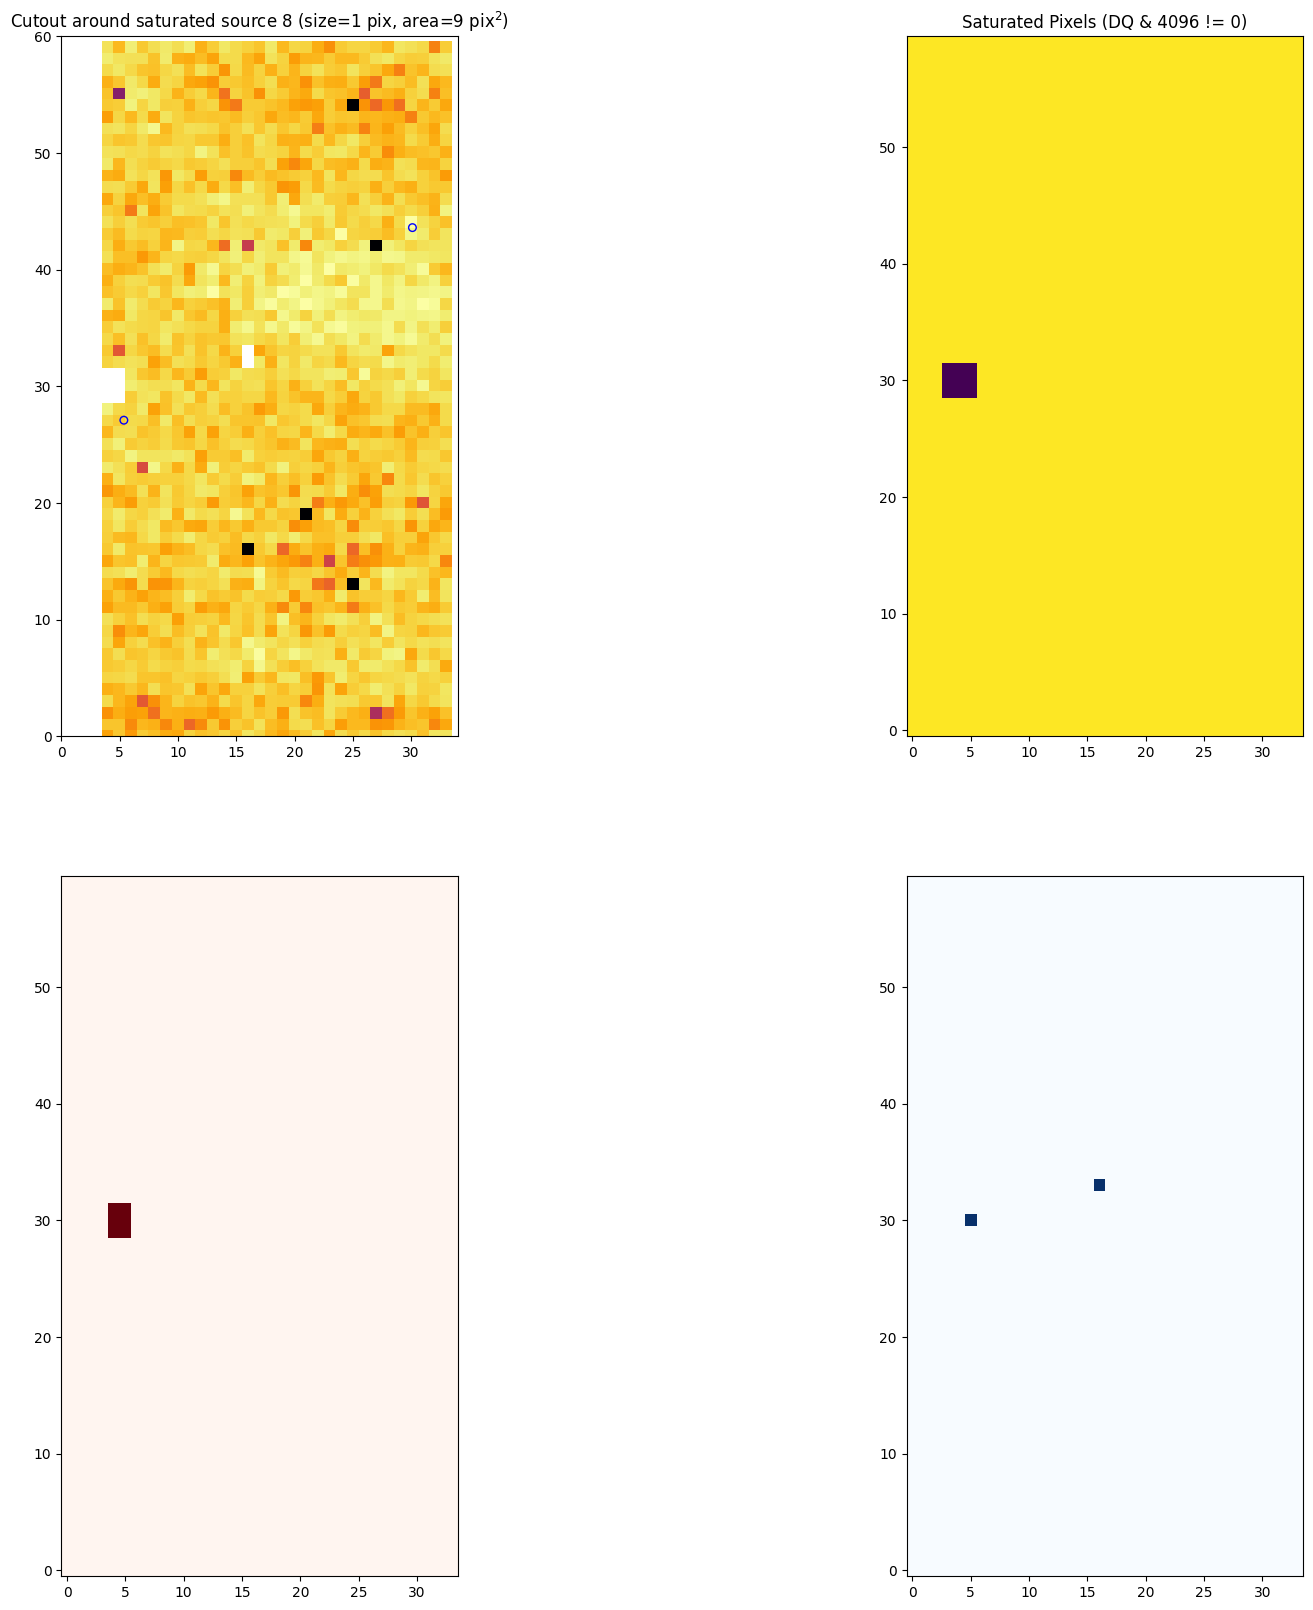

Source 9: center at (x, y) = (6, 2042)


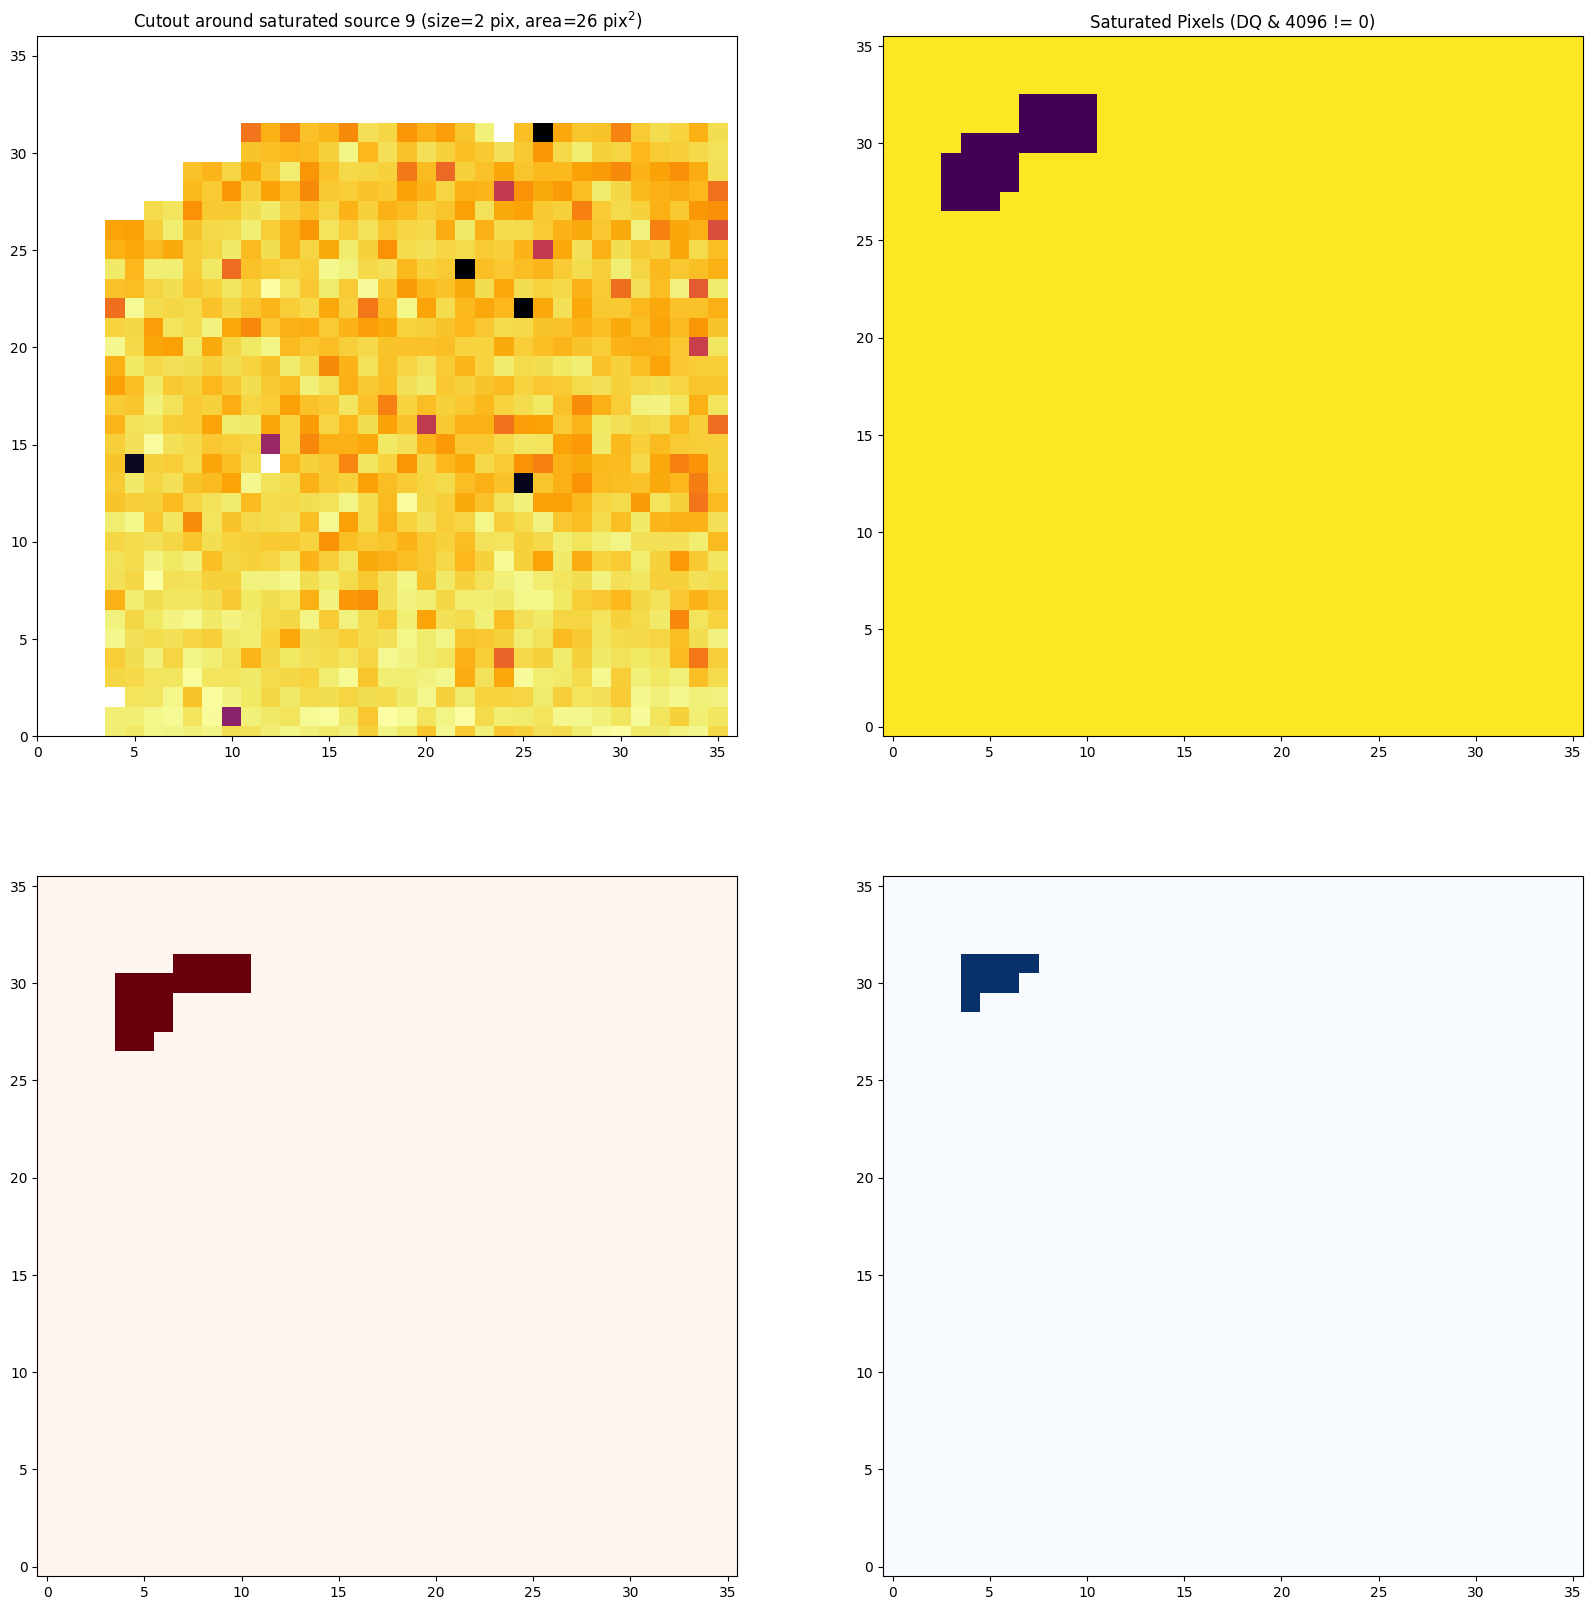

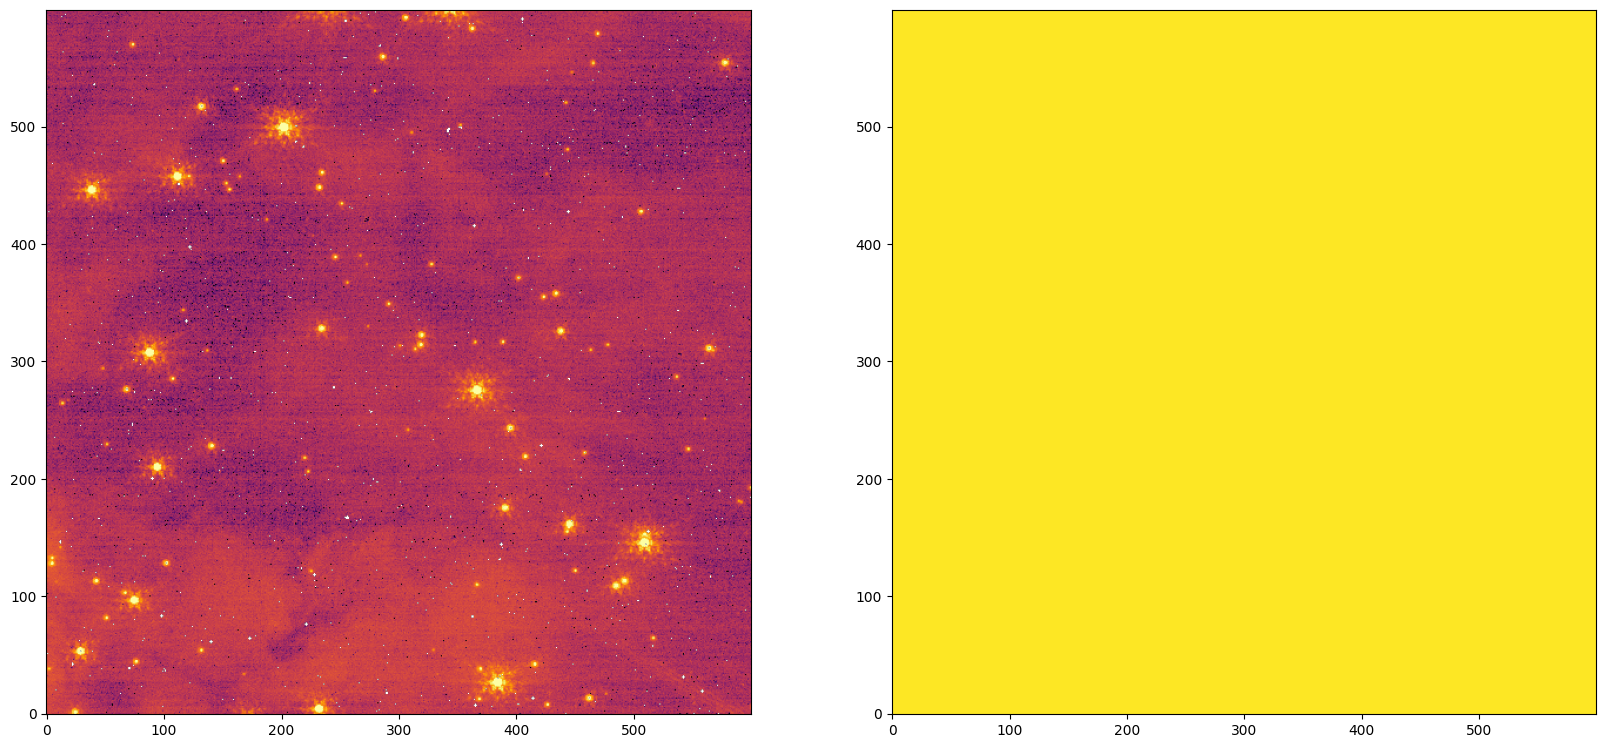

In [1]:
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
import numpy as np
from jwst.datamodels import dqflags
from scipy.ndimage import label, find_objects, center_of_mass, sum_labels


pad=30
filt = 'F140M'
if filt in ['F140M', 'F162M', 'F182M', 'F210M', 'F335M', 'F360M', 'F410M', 'F480M']:
    modules = ['nrca', 'nrcb']
else:
    modules = ['miri']
ras = []
decs = []
for module in modules:
    sat_star_list = glob.glob(f"/orange/adamginsburg/jwst/w51/{filt}/*{module}*daophot_combined_with_satstars.fits")
    for i, sat_star in enumerate(sat_star_list):
        if i ==0:
            print(sat_star)

            #combined_cat_filename = f"{basepath}/{filtername}/{filtername.lower()}_{detector}{visitid_}{vgroupid_}{exposure_}_daophot_combined_with_satstars.fits"
            filename = sat_star.split('/')[-1]
            module = filename.split('_')[1]
            visit = filename.split('_')[2]
            vgroup = filename.split('_')[3]
            exp = filename.split('_')[4]
            print(vgroup)
            
            #get the number coming at the end of "vgroup" and the format of the string is %4d.
            vgroup_num = int(vgroup[6:])
            print(vgroup_num)
            vgroup = f"{vgroup_num:05d}"
            vgroup2 = f"{vgroup_num:04d}"
            exp_num = exp[3:]

            img_filename = f"/orange/adamginsburg/jwst/w51/{filt}/pipeline/jw06151001001_{vgroup}_{exp_num}_{module}_cal.fits"
            img_filename = f"/orange/adamginsburg/jwst/w51/{filt}/pipeline/jw06151001001_{vgroup}_{exp_num}_{module}_align_o001_crf.fits"
            cat_basic_filename = f"/orange/adamginsburg/jwst/w51/{filt}/{filt.lower()}_{module}_{visit}_vgroup{vgroup2}_exp{exp_num}_daophot_basic.fits"
            cat_refined_filename = f"/orange/adamginsburg/jwst/w51/{filt}/{filt.lower()}_{module}_{visit}_vgroup{vgroup2}_exp{exp_num}_daophot_refined.fits"
            cat_not_refined = Table.read(sat_star.replace('daophot_combined_with_satstars.fits', 'daophot_basic.fits'))
            header_img = fits.getheader(img_filename, ext=('SCI', 1))
            img = fits.getdata(img_filename, ext=('SCI', 1))
            wcs_img = WCS(header_img)
            cat_satstar = Table.read(sat_star)
            skycoord = cat_satstar['skycoord_centroid']
            pixcoord = skycoord.to_pixel(wcs_img)

            cat_refined = Table.read(cat_refined_filename)
            cat_basic  = Table.read(cat_basic_filename)
            skycoord_refined = cat_refined['skycoord_centroid']
            skycoord_basic = cat_basic['skycoord_centroid']
            pixcoord_refined = skycoord_refined.to_pixel(wcs_img)
            pixcoord_basic = skycoord_basic.to_pixel(wcs_img)


            fig = plt.figure(figsize=(20,10))
            ax = fig.add_subplot(121, projection=wcs_img)
            norm = simple_norm(img, 'log', percent=99.5)
            ax.imshow(img, norm=norm, origin='lower', cmap='inferno')   
            from_sat_catalog = cat_satstar['from_sat_catalog']
            print(len(np.where(from_sat_catalog)[0]), 'sat stars from catalog')
            print(skycoord[from_sat_catalog])
            ax.scatter(pixcoord[0], pixcoord[1], s=50, edgecolor='cyan', facecolor='none', lw=1.5)
            ax.scatter(pixcoord[0][from_sat_catalog], pixcoord[1][from_sat_catalog], s=50, edgecolor='green', facecolor='none', lw=1.5)
            
            skycoord_before_refined = cat_not_refined['skycoord_centroid']
            pixcoord_before_refined = skycoord_before_refined.to_pixel(wcs_img)
            #ax.scatter(pixcoord_before_refined[0], pixcoord_before_refined[1], s=20, edgecolor='red', facecolor='none', lw=1.0)
            ax.set_title(f"{filename} with {len(cat_satstar)} stars")
            dqarr = fits.open(img_filename)['DQ'].data
            ax2 = fig.add_subplot(122, projection=wcs_img)
            is_saturated = (dqarr & dqflags.group['SATURATED']) != 0
            ax2.imshow(is_saturated, origin='lower', cmap='viridis_r')   
            ax2.set_title('Saturated Pixels (DQ & 4096 != 0)')
            is_hot = (dqarr & dqflags.pixel['HOT']) != 0
            is_dead = (dqarr & dqflags.pixel['DEAD']) != 0
           
            sources, num_sources = label(is_saturated)
            print(num_sources, 'number of saturated sources found')
            for i in range(num_sources):
                com = center_of_mass(is_saturated, labels=sources, index=i+1)
                # center_of_mass can return (nan, nan) for degenerate labels; guard against that
                if com is None:
                    print(f"Source {i+1}: center_of_mass returned None; skipping", flush=True)
                    continue
                yf, xf = com
                if not (np.isfinite(yf) and np.isfinite(xf)):
                    print(f"Source {i+1}: center_of_mass returned NaN or infinite values ({yf}, {xf}); skipping", flush=True)
                    continue
                ycen = int(round(yf))
                xcen = int(round(xf))
                ax2.scatter(xcen, ycen, s=100, edgecolor='red', facecolor='none', lw=2.0)
                ax2.text(xcen+5, ycen+5, f"{i+1}", color='white', fontsize=12)
            # also mark the pixels where  issaturated array is nan
            nan_y, nan_x = np.where(np.isnan(is_saturated))

            print(f"Found {len(nan_x)} NaN DQ pixels")
            ax2.scatter(nan_x, nan_y, s=100, edgecolor='blue', facecolor='none', lw=2.0, label='DQ NaN pixels')
            plt.show()
            plt.close()
            for i in range(num_sources):
                com = center_of_mass(is_saturated, labels=sources, index=i+1)
                # center_of_mass can return (nan, nan) for degenerate labels; guard against that
                if com is None:
                    print(f"Source {i+1}: center_of_mass returned None; skipping", flush=True)
                    continue
                yf, xf = com
                if not (np.isfinite(yf) and np.isfinite(xf)):
                    print(f"Source {i+1}: center_of_mass returned NaN or infinite values ({yf}, {xf}); skipping", flush=True)
                    continue
                ycen = int(round(yf))
                xcen = int(round(xf))
                print(f"Source {i+1}: center at (x, y) = ({xcen}, {ycen})")
                y0 = int(max(0, ycen - pad))
                y1 = int(min(img.shape[0], ycen + pad))
                x0 = int(max(0, xcen - pad))
                x1 = int(min(img.shape[1], xcen + pad))
                size_saturated = int(np.sqrt(sum_labels(is_saturated, labels=sources, index=i+1))/2)
                area_saturated = sum_labels(is_saturated, labels=sources, index=i+1)
                cutout = img[y0:y1, x0:x1]
                fig2 = plt.figure(figsize=(20,20))
                ax = fig2.add_subplot(221)
                norm = simple_norm(cutout, 'log', percent=99.5)
                ax.imshow(cutout, norm=norm, origin='lower', cmap='inferno')   
                ax.scatter(pixcoord[0][from_sat_catalog]-x0, pixcoord[1][from_sat_catalog]-y0, s=50, edgecolor='magenta', facecolor='none', lw=1.5)
                ax.scatter(pixcoord_basic[0]-x0, pixcoord_basic[1]-y0, s=30, edgecolor='blue', facecolor='none', lw=1.0)
                ax.scatter(pixcoord_refined[0]-x0, pixcoord_refined[1]-y0, s=30, edgecolor='cyan', facecolor='none', lw=1.0)
                ax.set_title(f"Cutout around saturated source {i+1} (size={size_saturated} pix, area={area_saturated} pix$^2$)")
                ax.set_xlim(0, cutout.shape[1])
                ax.set_ylim(0, cutout.shape[0])
                cutout_dq = is_saturated[y0:y1, x0:x1]
                ax2 = fig2.add_subplot(222)
                ax2.imshow(cutout_dq, origin='lower', cmap='viridis_r')   
                ax2.set_title('Saturated Pixels (DQ & 4096 != 0)')
                ax3 = fig2.add_subplot(223)
                cutout_hot = is_hot[y0:y1, x0:x1]
                cutout_dead = is_dead[y0:y1, x0:x1]
                
                ax3.imshow(cutout_hot, origin='lower', cmap='Reds')
                ax4 = fig2.add_subplot(224)
                ax4.imshow(cutout_dead, origin='lower', cmap='Blues')


                plt.show()
                plt.close()
            fig = plt.figure(figsize=(20,10))
            ax1 = fig.add_subplot(121)
            norm = simple_norm(img, 'log', percent=99.5)
            ax1.imshow(img[1400:2000,800:1400], norm=norm, origin='lower', cmap='inferno')
            ax2 = fig.add_subplot(122)
            ax2.imshow(is_saturated[1400:2000, 800:1400], origin='lower', cmap='viridis_r')
            
